In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

## Fbref

In [2]:
fbref_data = pd.read_csv('../../data/raw/fbref/fbref_matches.csv')
fbref_data.columns = fbref_data.columns.str.lower()
fbref_data['date'] = pd.to_datetime(fbref_data['date'])
fbref_data['round'] = fbref_data['round'].str.replace('Matchweek ', '').astype(int)
fbref_data = fbref_data[fbref_data['season'].isin(['2020-2021', '2021-2022', '2022-2023', '2023-2024', '2024-2025'])]
fbref_data

date   time            comp  round  day venue result   gf   ga  \
0    2024-08-17  12:30  Premier League      1  Sat  Away      W  2.0  0.0   
1    2024-08-25  16:30  Premier League      2  Sun  Home      W  2.0  0.0   
2    2024-09-01  16:00  Premier League      3  Sun  Away      W  3.0  0.0   
3    2024-09-14  15:00  Premier League      4  Sat  Home      L  0.0  1.0   
4    2024-09-21  15:00  Premier League      5  Sat  Home      W  3.0  0.0   
...         ...    ...             ...    ...  ...   ...    ...  ...  ...   
3235 2021-05-02  19:15  Premier League     34  Sun  Away      L  0.0  4.0   
3236 2021-05-08  15:00  Premier League     35  Sat  Home      L  0.0  2.0   
3237 2021-05-16  19:00  Premier League     36  Sun  Away      W  1.0  0.0   
3238 2021-05-19  18:00  Premier League     37  Wed  Away      L  0.0  1.0   
3239 2021-05-23  16:00  Premier League     38  Sun  Home      W  1.0  0.0   

             opponent  ...  performance int  performance tklw  \
0        Ipswich Town  ...              5.0               4.0   
1           Brentford  ...              7.0              10.0   
2      Manchester Utd  ...             10.0              17.0   
3     Nott'ham Forest  ...             11.0               8.0   
4         Bournemouth  ...              6.0              14.0   
...               ...  ...              ...               ...   
3235        Tottenham  ...              8.0               7.0   
3236   Crystal Palace  ...              9.0              13.0   
3237          Everton  ...              8.0               7.0   
3238    Newcastle Utd  ...              4.0              10.0   
3239          Burnley  ...              5.0              13.0   

      performance pkwon  performance pkcon performance og performance recov  \
0                   0.0                0.0            0.0              40.0   
1                   0.0                0.0            0.0              47.0   
2                   0.0                0.0            0.0              53.0   
3                   0.0                0.0            0.0              47.0   
4                   0.0                0.0            0.0              44.0   
...                 ...                ...            ...               ...   
3235                0.0                0.0            0.0              51.0   
3236                0.0                0.0            0.0              52.0   
3237                0.0                0.0            0.0              55.0   
3238                0.0                0.0            0.0              41.0   
3239                0.0                0.0            0.0              55.0   

     aerial duels won aerial duels lost     season              team  
0                18.0              11.0  2024-2025         Liverpool  
1                 6.0               8.0  2024-2025         Liverpool  
2                13.0               5.0  2024-2025         Liverpool  
3                21.0              12.0  2024-2025         Liverpool  
4                 9.0               6.0  2024-2025         Liverpool  
...               ...               ...        ...               ...  
3235              8.0              13.0  2020-2021  Sheffield United  
3236             15.0              19.0  2020-2021  Sheffield United  
3237             12.0              27.0  2020-2021  Sheffield United  
3238             14.0              16.0  2020-2021  Sheffield United  
3239             39.0              44.0  2020-2021  Sheffield United  

[3240 rows x 135 columns]

In [3]:
fbref_team_map = {
    'Liverpool': 'LIV',
    'Manchester City': 'MCI',
    'Nottingham Forest': 'NFO',
    'Chelsea': 'CHE',
    'Arsenal': 'ARS',
    'Aston Villa': 'AVL',
    'Tottenham Hotspur': 'TOT',
    'Brighton and Hove Albion': 'BHA',
    'Fulham': 'FUL',
    'Bournemouth': 'BOU',
    'Newcastle United': 'NEW',
    'Brentford': 'BRE',
    'Manchester United': 'MUN',
    'West Ham United': 'WHU',
    'Leicester City': 'LEI',
    'Everton': 'EVE',
    'Crystal Palace': 'CRY',
    'Ipswich Town': 'IPS',
    'Southampton': 'SOU',
    'Wolverhampton Wanderers': 'WOL',
    'Luton Town': 'LUT',
    'Burnley': 'BUR',
    'Sheffield United': 'SHU',
    'Leeds United': 'LEE',
    'Watford': 'WAT',
    'Norwich City': 'NOR',
    'West Bromwich Albion': 'WBA'
}

fbref_opponent_map = {
    'Ipswich Town': 'IPS',
    'Brentford': 'BRE',
    'Manchester Utd': 'MUN',
    "Nott'ham Forest": 'NFO',
    'Bournemouth': 'BOU',
    'Wolves': 'WOL',
    'Crystal Palace': 'CRY',
    'Chelsea': 'CHE',
    'Arsenal': 'ARS',
    'Brighton': 'BHA',
    'West Ham': 'WHU',
    'Newcastle Utd': 'NEW',
    'Fulham': 'FUL',
    'Southampton': 'SOU',
    'Liverpool': 'LIV',
    'Leicester City': 'LEI',
    'Manchester City': 'MCI',
    'Aston Villa': 'AVL',
    'Tottenham': 'TOT',
    'Everton': 'EVE',
    'Burnley': 'BUR',
    'Sheffield Utd': 'SHU',
    'Luton Town': 'LUT',
    'Leeds United': 'LEE',
    'Norwich City': 'NOR',
    'Watford': 'WAT',
    'West Brom': 'WBA'
}

fbref_data['team'] = fbref_data['team'].map(fbref_team_map)
fbref_data['opponent'] = fbref_data['opponent'].map(fbref_opponent_map)

In [4]:
fbref_data['result'] = fbref_data['gf'] - fbref_data['ga']

C:\Users\admin\AppData\Local\Temp\ipykernel_44020\2678033371.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_corr_res.index, y=high_corr_res.values, palette='magma')


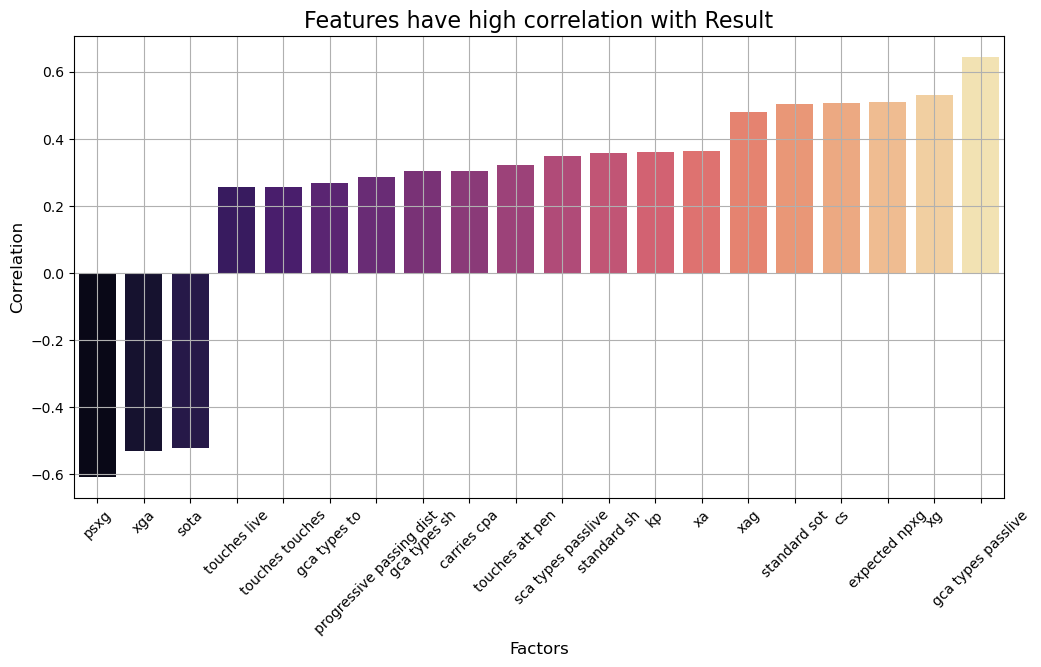

In [5]:
corr_res = fbref_data.select_dtypes(include=[np.number]).corr()['result'].drop(['result', 'gf', 'ga', 
            'standard gls', 'ast', 'expected xg']).sort_values(ascending=True)
high_corr_res = corr_res[abs(corr_res) > 0.25]

plt.figure(figsize=(12, 6))
sns.barplot(x=high_corr_res.index, y=high_corr_res.values, palette='magma')
plt.title('Features have high correlation with Result', fontsize=16)
plt.xlabel('Factors', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [6]:
features_to_use = ['gf', 'ga', 'xg', 'xga', 'standard sot', 'kp', 'xa', 'poss_x', 'touches att pen', 'carries prgdist', 'progressive passing dist', 'tackles tklw', 
                'challenges tkl%', 'saves']
fbref_data = fbref_data[['team', 'opponent', 'date', 'season', 'round', 'venue'] + features_to_use + ['result']]
fbref_data.head()

team opponent       date     season  round venue   gf   ga   xg  xga  ...  \
0  LIV      IPS 2024-08-17  2024-2025      1  Away  2.0  0.0  2.6  0.5  ...   
1  LIV      BRE 2024-08-25  2024-2025      2  Home  2.0  0.0  2.5  0.5  ...   
2  LIV      MUN 2024-09-01  2024-2025      3  Away  3.0  0.0  1.8  1.4  ...   
3  LIV      NFO 2024-09-14  2024-2025      4  Home  0.0  1.0  0.9  0.4  ...   
4  LIV      BOU 2024-09-21  2024-2025      5  Home  3.0  0.0  2.0  1.1  ...   

     kp   xa  poss_x  touches att pen  carries prgdist  \
0  12.0  2.4    62.0             46.0            974.0   
1  17.0  1.6    62.0             40.0           1188.0   
2   9.0  1.1    47.0             26.0            934.0   
3  13.0  1.4    68.0             31.0           1306.0   
4  18.0  1.0    58.0             28.0           1191.0   

   progressive passing dist  tackles tklw  challenges tkl%  saves  result  
0                    3005.0           4.0             62.5    2.0     2.0  
1                    3284.0          10.0             68.4    2.0     2.0  
2                    2308.0          17.0             61.9    3.0     3.0  
3                    3200.0           8.0             45.5    2.0    -1.0  
4                    3369.0          14.0             52.2    6.0     3.0  

[5 rows x 21 columns]

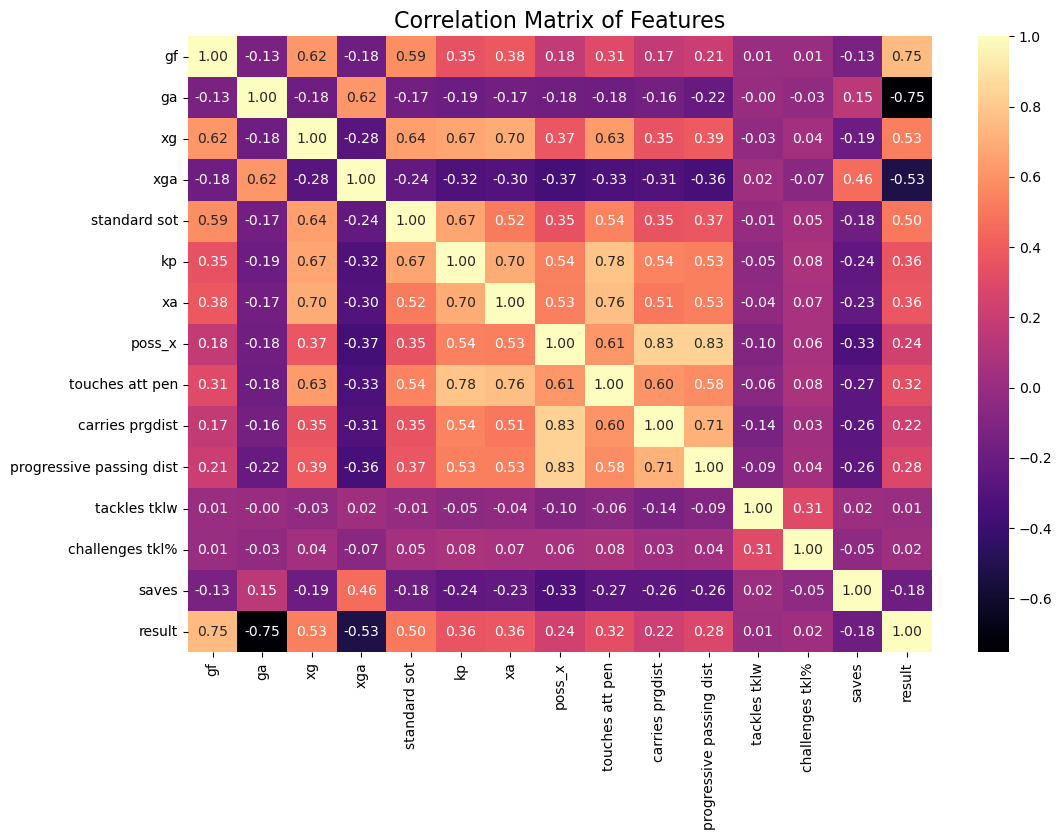

In [7]:
# correlation matrix of features_to_use and result
corr = fbref_data[features_to_use + ['result']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='magma', fmt=".2f")
plt.title('Correlation Matrix of Features', fontsize=16)
plt.show()

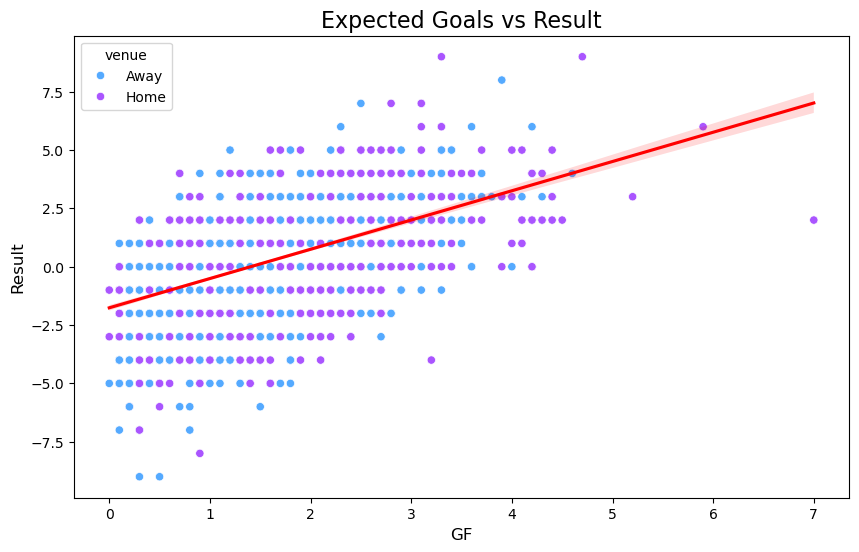

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='xg', y='result', data=fbref_data, hue='venue', palette='cool')
sns.regplot(x='xg', y='result', data=fbref_data, scatter=False, color='red')
plt.title('Expected Goals vs Result', fontsize=16)
plt.xlabel('GF', fontsize=12)
plt.ylabel('Result', fontsize=12)
plt.show()

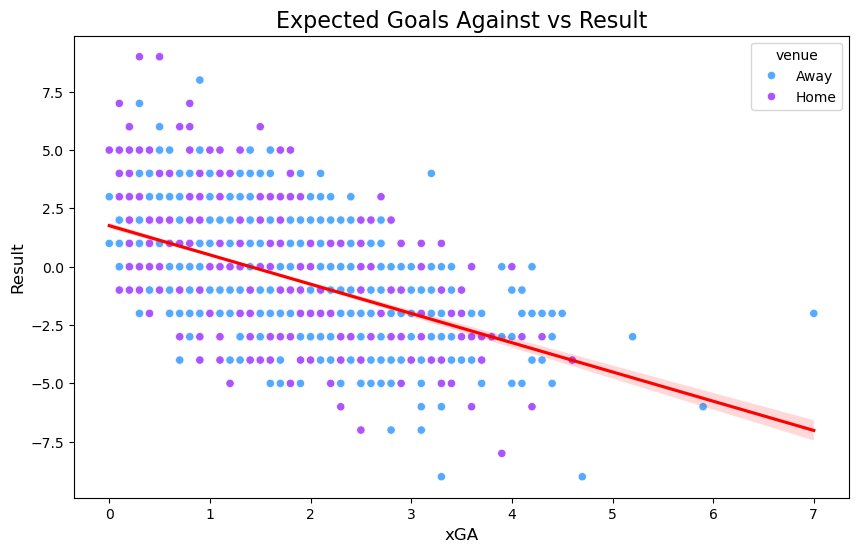

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='xga', y='result', data=fbref_data, hue='venue', palette='cool')
sns.regplot(x='xga', y='result', data=fbref_data, scatter=False, color='red')
plt.title('Expected Goals Against vs Result', fontsize=16)
plt.xlabel('xGA', fontsize=12)
plt.ylabel('Result', fontsize=12)
plt.show()

### Distribution

In [10]:
plt.style.use('ggplot')

In [11]:
stat_features = ['gf', 'ga', 'xg', 'xga', 'standard sot', 'kp', 'xa', 'poss_x', 'touches att pen',
       'carries prgdist', 'progressive passing dist', 'tackles tklw', 'challenges tkl%', 'saves']

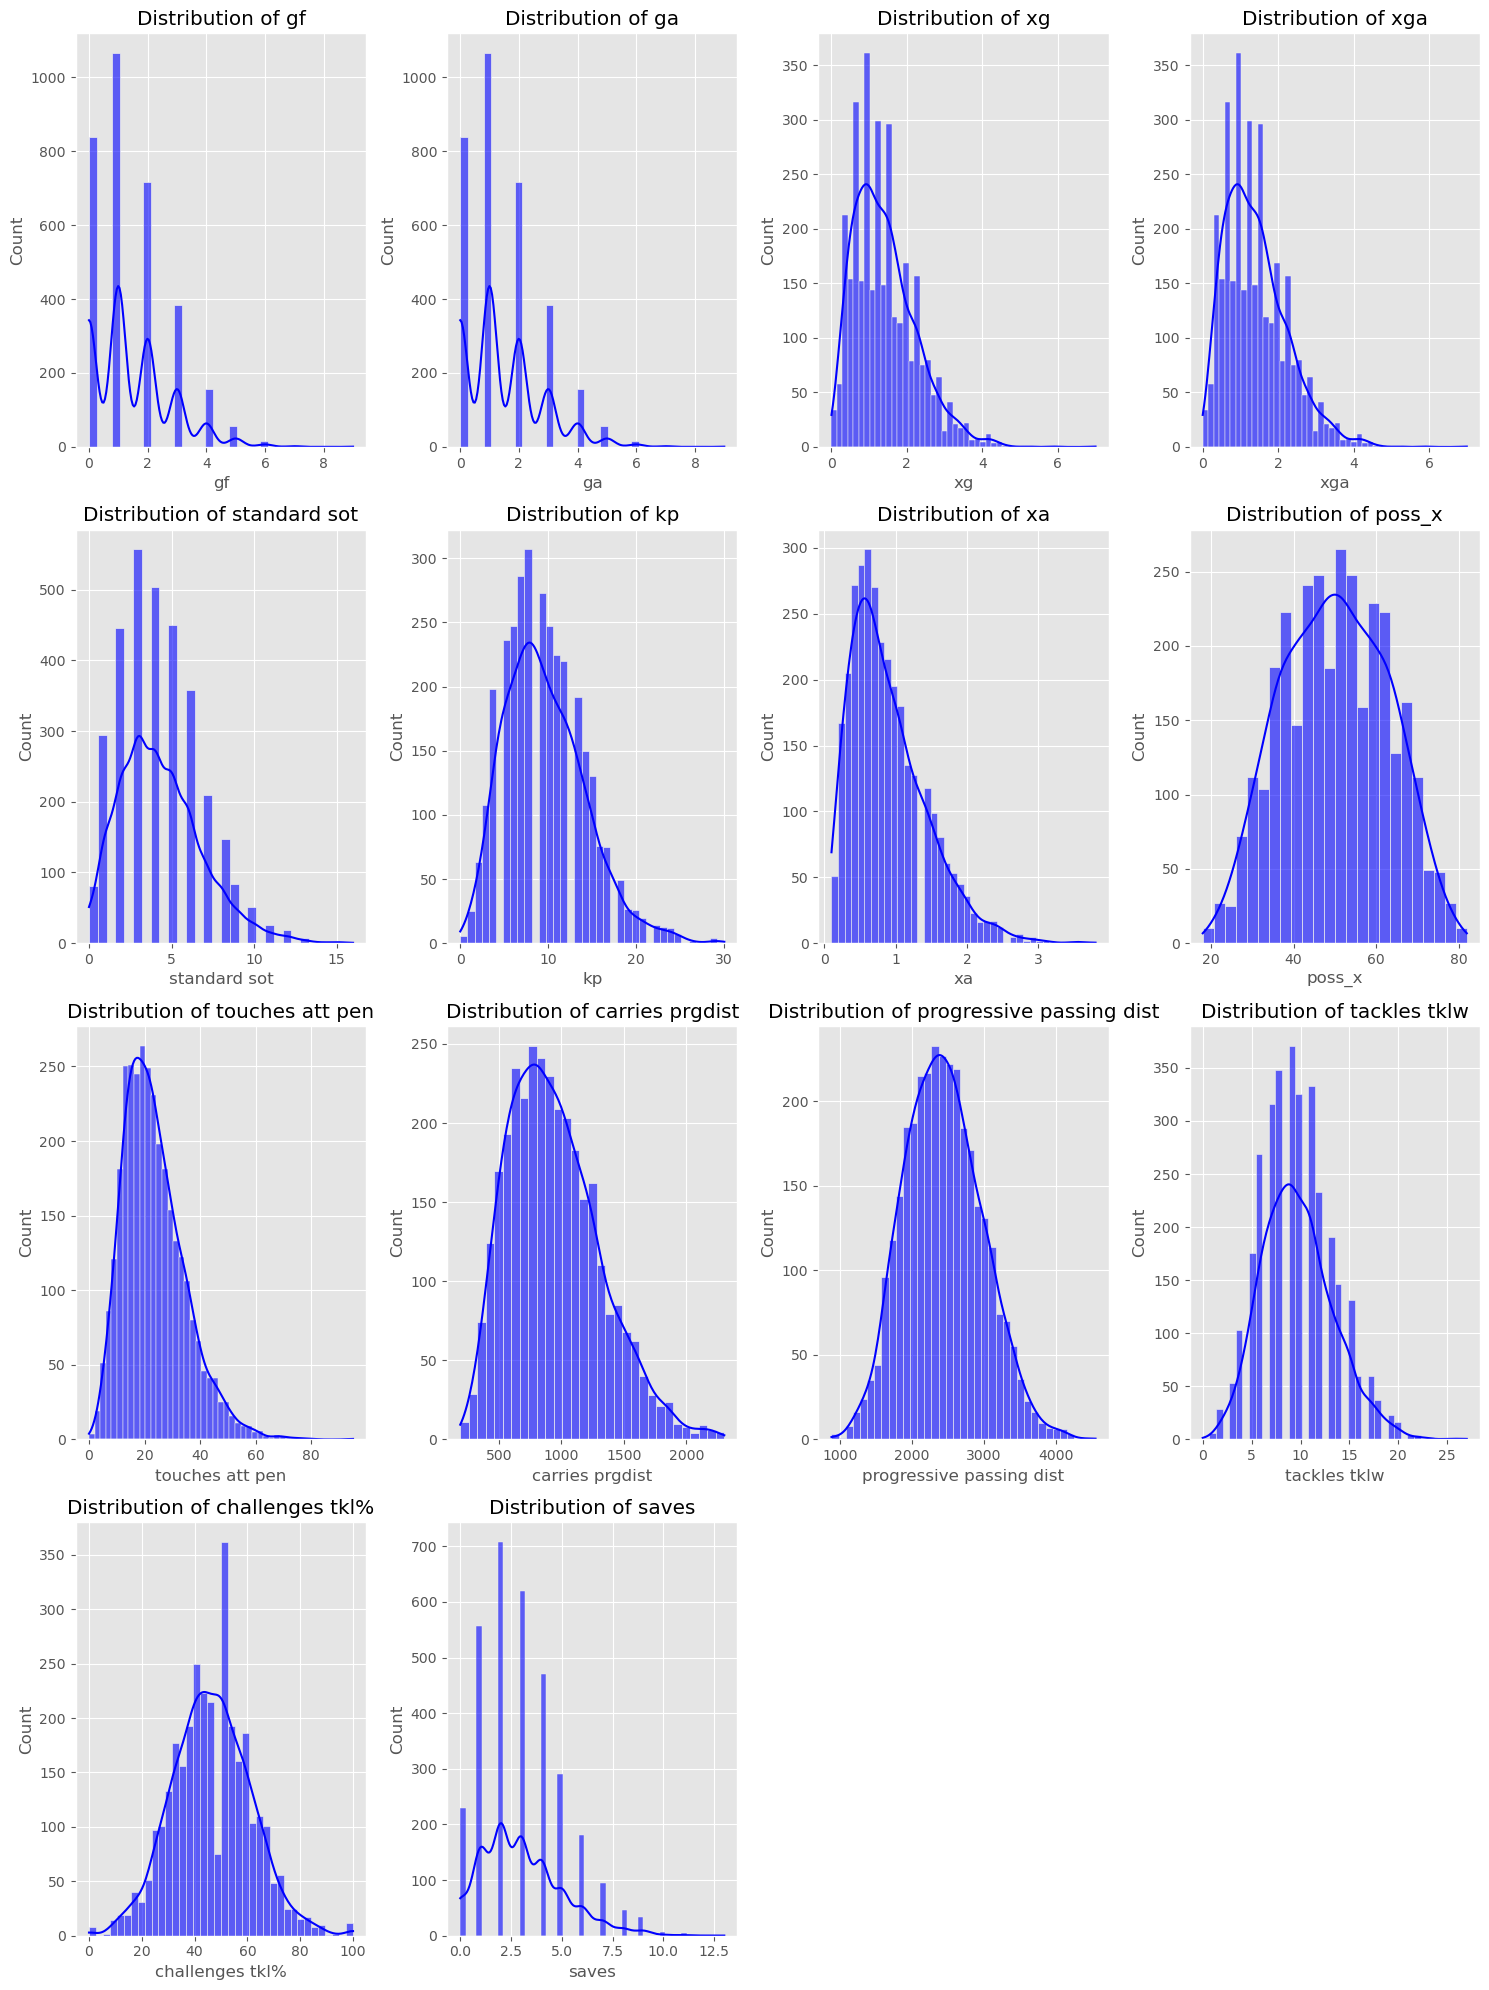

In [67]:
import math

num_features = len(stat_features)
cols = 4
rows = math.ceil(num_features / cols)
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten() 
for i, feature in enumerate(stat_features):
    sns.histplot(fbref_data[feature], kde=True, ax=axes[i], color='blue', alpha=0.6)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Exploration

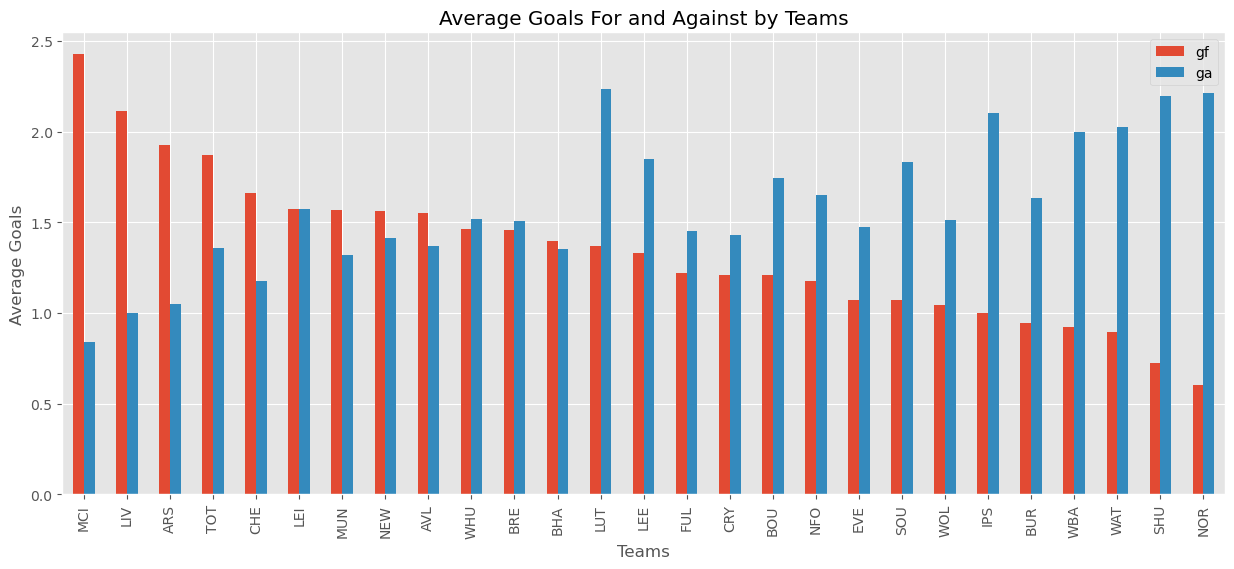

In [13]:
team_stats = fbref_data.groupby('team').agg({'gf': 'mean', 'ga': 'mean'}).sort_values('gf', ascending=False)
team_stats.plot(kind='bar', figsize=(15, 6))
plt.title('Average Goals For and Against by Teams')
plt.xlabel('Teams')
plt.ylabel('Average Goals')
plt.show()

<Axes: xlabel='team'>

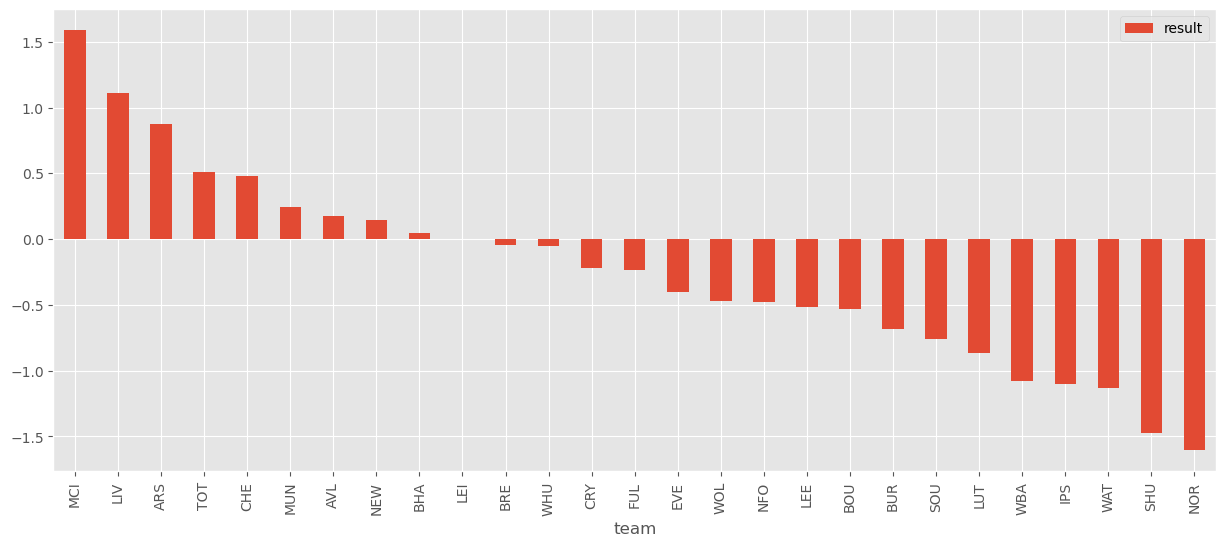

In [14]:
team_stats = fbref_data.groupby('team').agg({'result': 'mean'}).sort_values('result', ascending=False)
team_stats.plot(kind='bar', figsize=(15, 6))

In [15]:
top_teams = team_stats.head(5).index
bot_teams = team_stats.tail(5).index

## After getform

In [16]:
after_getform = pd.read_csv('../../data/transformed/after_getform.csv')
after_getform.head()

team opponent        date     season  round venue  noscale_gf  noscale_ga  \
0  ARS      FUL  2020-09-12  2020-2021      1  Away         3.0         0.0   
1  ARS      WHU  2020-09-19  2020-2021      2  Home         2.0         1.0   
2  ARS      LIV  2020-09-28  2020-2021      3  Away         1.0         3.0   
3  ARS      SHU  2020-10-04  2020-2021      4  Home         2.0         1.0   
4  ARS      MCI  2020-10-17  2020-2021      5  Away         0.0         1.0   

         gf        ga  ...  form_standard sot   form_kp   form_xa  \
0  1.186179 -1.116529  ...                NaN       NaN       NaN   
1  0.418610 -0.348960  ...                NaN       NaN       NaN   
2 -0.348960  1.186179  ...           0.288011 -0.347434  0.197909   
3  0.418610 -0.348960  ...          -0.518520 -0.782398  1.312436   
4 -1.116529 -0.348960  ...          -0.115254 -0.891140 -0.173600   

   form_poss_x  form_touches att pen  form_carries prgdist  \
0          NaN                   NaN                   NaN   
1          NaN                   NaN                   NaN   
2     0.312941              0.227142              1.053251   
3     0.938921              0.406552              1.574399   
4    -0.469533             -0.490498              0.171100   

   form_progressive passing dist  form_tackles tklw  form_challenges tkl%  \
0                            NaN                NaN                   NaN   
1                            NaN                NaN                   NaN   
2                       0.452140          -1.278476              0.237321   
3                       0.507684          -1.278476              0.536472   
4                      -0.588375          -1.141894             -0.317772   

   form_saves  
0         NaN  
1         NaN  
2   -0.500357  
3   -1.002884  
4    0.253435  

[5 rows x 36 columns]

In [17]:
after_getform.columns

Index(['team', 'opponent', 'date', 'season', 'round', 'venue', 'noscale_gf',
       'noscale_ga', 'gf', 'ga', 'xg', 'xga', 'standard sot', 'kp', 'xa',
       'poss_x', 'touches att pen', 'carries prgdist',
       'progressive passing dist', 'tackles tklw', 'challenges tkl%', 'saves',
       'form_gf', 'form_ga', 'form_xg', 'form_xga', 'form_standard sot',
       'form_kp', 'form_xa', 'form_poss_x', 'form_touches att pen',
       'form_carries prgdist', 'form_progressive passing dist',
       'form_tackles tklw', 'form_challenges tkl%', 'form_saves'],
      dtype='object')

In [18]:
categories = ['team', 'xg', 'standard sot', 'kp', 'xa', 'poss_x', 'touches att pen', 'carries prgdist', 'progressive passing dist', 
                'tackles tklw', 'challenges tkl%', 'saves', 'xga']

In [19]:
top_teams_df = after_getform[after_getform['team'].isin(top_teams)][categories]
top_teams_df = top_teams_df.groupby('team').mean()

bot_teams_df = after_getform[after_getform['team'].isin(bot_teams)][categories]
bot_teams_df = bot_teams_df.groupby('team').mean()

In [20]:
categories_explained = ['xG', 'Shots on Target', 'Key Passes', 'xA', 'Possession', 'Touches in Attacking Penalty Box', 
                'Carries with Progressive Distance', 'Progressive Passing Distance', 'Tackles Won', 'Tackle Success Rate', 'Saves', 'xGA']

fig = go.Figure()
for team, values in top_teams_df.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=categories_explained,
        fill='toself',
        name=team
    ))
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[-2, 2]  
        )
    ),
    title='Comparison of Top 5 strongest teams in all seasons',
    showlegend=True
)
fig.show()

fig = go.Figure()
for team, values in bot_teams_df.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=categories_explained,
        fill='toself',
        name=team
    ))
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[-2, 2]  
        )
    ),
    title='Comparison of Top 5 weakest teams in all seasons',
    showlegend=True
)
fig.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_44020\2284636020.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\admin\AppData\Local\Temp\ipykernel_44020\2284636020.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\admin\AppData\Local\Temp\ipykernel_44020\2284636020.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

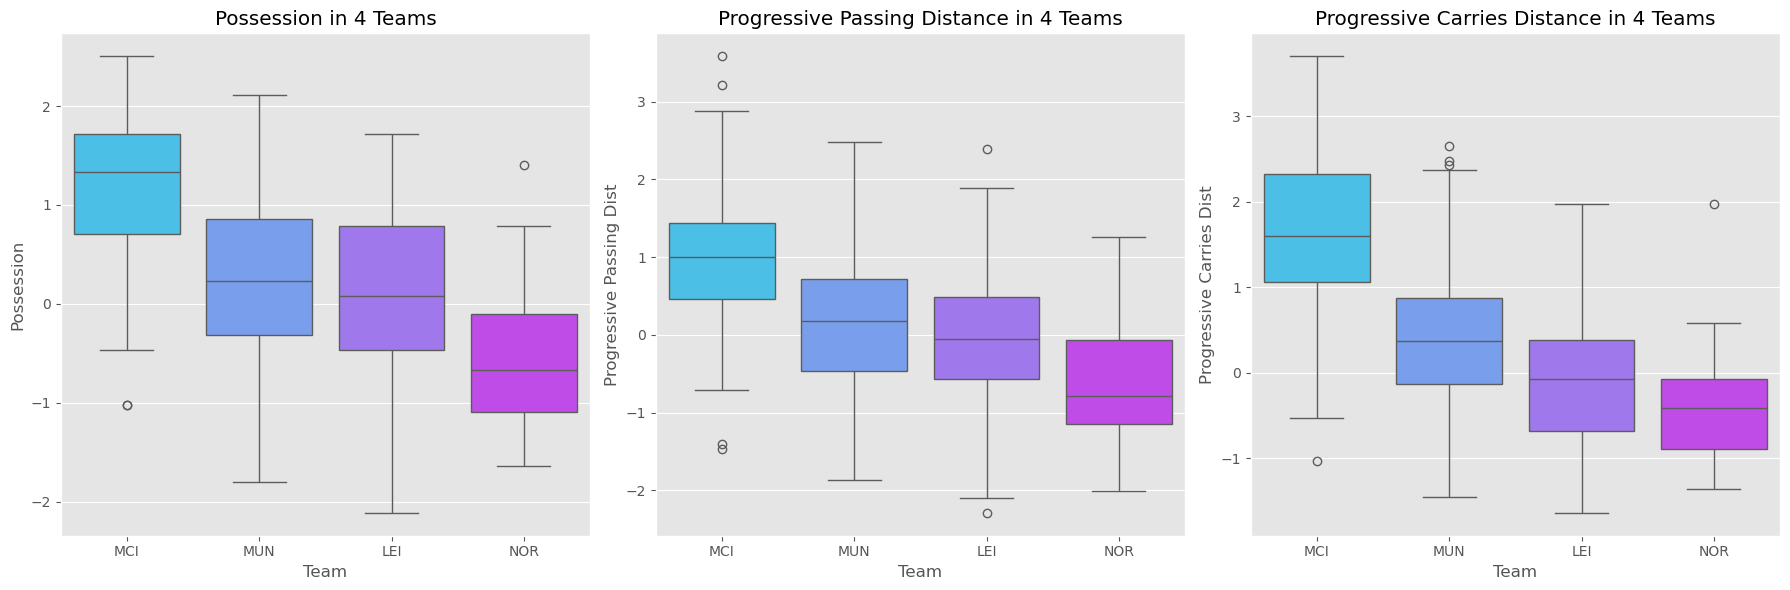

In [70]:
mci = after_getform[after_getform['team'] == 'MCI']
mun = after_getform[after_getform['team'] == 'MUN']
lei = after_getform[after_getform['team'] == 'LEI']
wba = after_getform[after_getform['team'] == 'NOR']

mci['team_label'] = 'MCI'
mun['team_label'] = 'MUN'
lei['team_label'] = 'LEI'
wba['team_label'] = 'NOR'

combined_data = pd.concat([mci, mun, lei, wba])

fig, axes = plt.subplots(1, 3, figsize=(18, 6)) 

sns.boxplot(x='team_label', y='poss_x', data=combined_data, palette='cool', ax=axes[0])
axes[0].set_title('Possession in 4 Teams')
axes[0].set_xlabel('Team')
axes[0].set_ylabel('Possession')

sns.boxplot(x='team_label', y='progressive passing dist', data=combined_data, palette='cool', ax=axes[1])
axes[1].set_title('Progressive Passing Distance in 4 Teams')
axes[1].set_xlabel('Team')
axes[1].set_ylabel('Progressive Passing Dist')

sns.boxplot(x='team_label', y='carries prgdist', data=combined_data, palette='cool', ax=axes[2])
axes[2].set_title('Progressive Carries Distance in 4 Teams')
axes[2].set_xlabel('Team')
axes[2].set_ylabel('Progressive Carries Dist')

plt.tight_layout()
plt.show()

### Form vs Reality

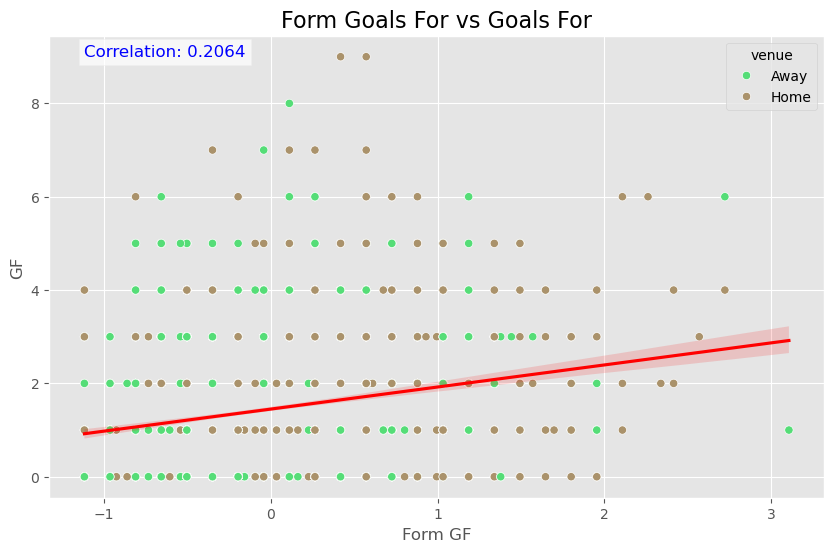

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='form_gf', y='noscale_gf', hue='venue', data=after_getform, palette='terrain')
sns.regplot(x='form_gf', y='noscale_gf', data=after_getform, scatter=False, color='red')
plt.title('Form Goals For vs Goals For', fontsize=16)
plt.xlabel('Form GF', fontsize=12)
plt.ylabel('GF', fontsize=12)
corr_xg_gf = after_getform[['form_gf', 'noscale_gf']].corr().iloc[0, 1]
plt.text(x=after_getform['form_gf'].min(), 
         y=after_getform['noscale_gf'].max(), 
         s=f"Correlation: {corr_xg_gf:.4f}", 
         fontsize=12, color='blue', bbox=dict(facecolor='white', alpha=0.7))
plt.show()

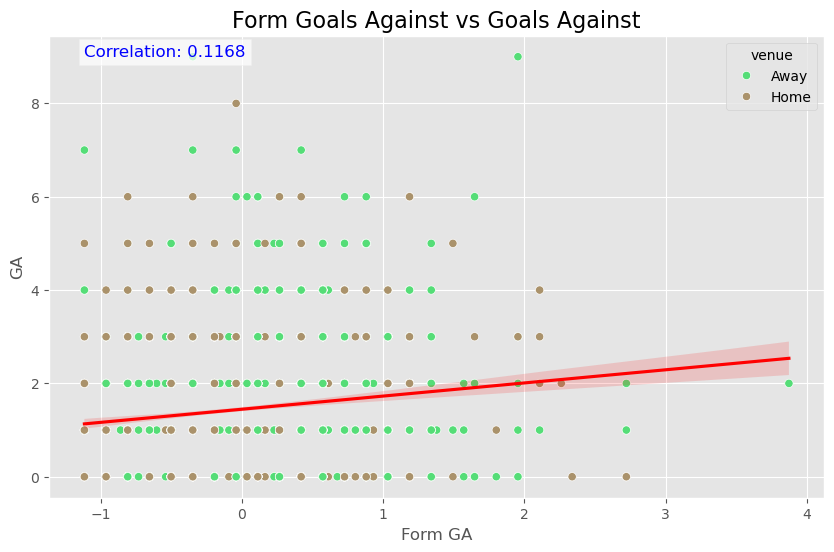

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='form_ga', y='noscale_ga', hue='venue', data=after_getform, palette='terrain')
sns.regplot(x='form_ga', y='noscale_ga', data=after_getform, scatter=False, color='red')
plt.title('Form Goals Against vs Goals Against', fontsize=16)
plt.xlabel('Form GA', fontsize=12)
plt.ylabel('GA', fontsize=12)
corr_xg_ga = after_getform[['form_ga', 'noscale_ga']].corr().iloc[0, 1]
plt.text(x=after_getform['form_ga'].min(), 
         y=after_getform['noscale_ga'].max(), 
         s=f"Correlation: {corr_xg_ga:.4f}", 
         fontsize=12, color='blue', bbox=dict(facecolor='white', alpha=0.7))
plt.show()

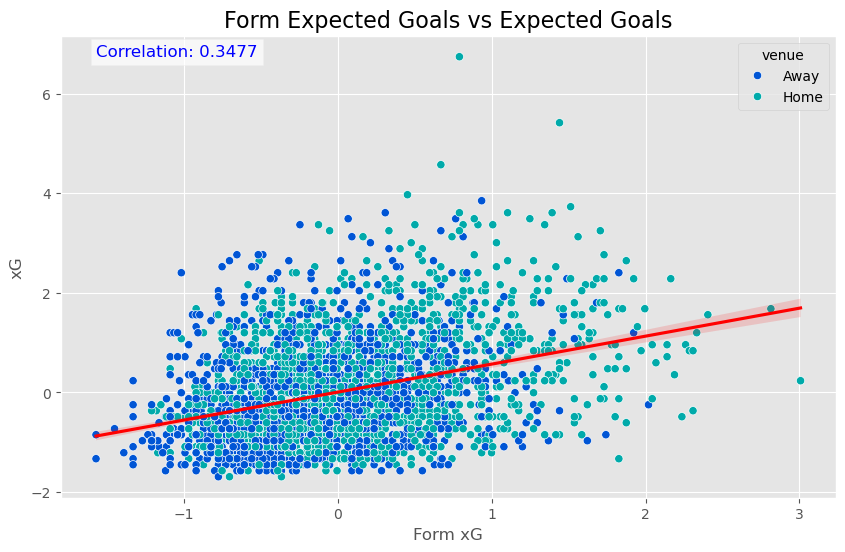

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='form_xg', y='xg', hue='venue', data=after_getform, palette='winter')
sns.regplot(x='form_xg', y='xg', data=after_getform, scatter=False, color='red')
plt.title('Form Expected Goals vs Expected Goals', fontsize=16)
plt.xlabel('Form xG', fontsize=12)
plt.ylabel('xG', fontsize=12)
corr_xg_xg = after_getform[['form_xg', 'xg']].corr().iloc[0, 1]
plt.text(x=after_getform['form_xg'].min(), 
         y=after_getform['xg'].max(), 
         s=f"Correlation: {corr_xg_xg:.4f}", 
         fontsize=12, color='blue', bbox=dict(facecolor='white', alpha=0.7))
plt.show()

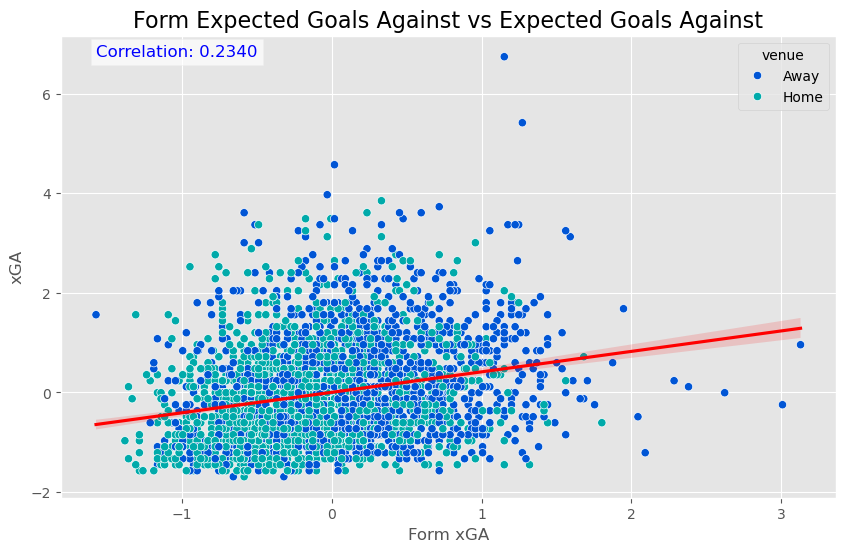

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='form_xga', y='xga', hue='venue', data=after_getform, palette='winter')
sns.regplot(x='form_xga', y='xga', data=after_getform, scatter=False, color='red')
plt.title('Form Expected Goals Against vs Expected Goals Against', fontsize=16)
plt.xlabel('Form xGA', fontsize=12)
plt.ylabel('xGA', fontsize=12)
corr_xga_xga = after_getform[['form_xga', 'xga']].corr().iloc[0, 1]
plt.text(x=after_getform['form_xga'].min(), 
         y=after_getform['xga'].max(), 
         s=f"Correlation: {corr_xga_xga:.4f}", 
         fontsize=12, color='blue', bbox=dict(facecolor='white', alpha=0.7))
plt.show()

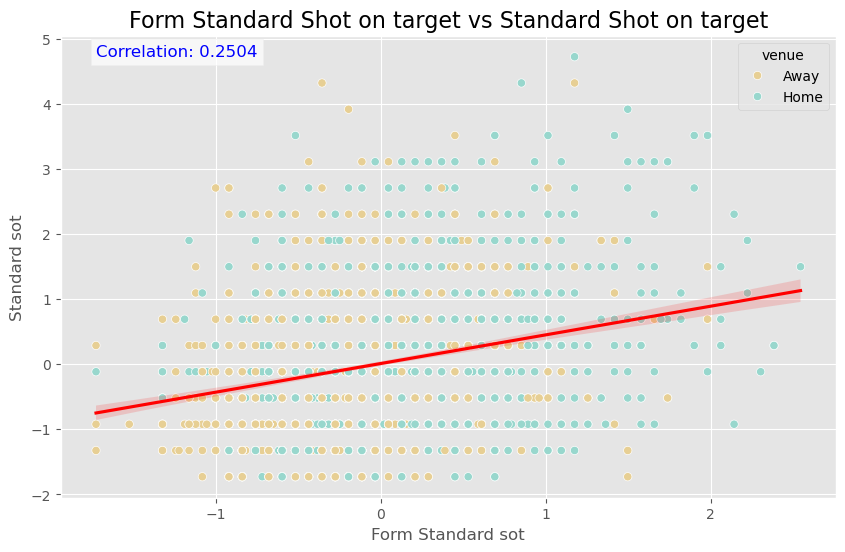

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='form_standard sot', y='standard sot', hue='venue', data=after_getform, palette='BrBG')
sns.regplot(x='form_standard sot', y='standard sot', data=after_getform, scatter=False, color='red')
plt.title('Form Standard Shot on target vs Standard Shot on target', fontsize=16)
plt.xlabel('Form Standard sot', fontsize=12)
plt.ylabel('Standard sot', fontsize=12)
corr_sot_sot = after_getform[['form_standard sot', 'standard sot']].corr().iloc[0, 1]
plt.text(x=after_getform['form_standard sot'].min(), 
         y=after_getform['standard sot'].max(), 
         s=f"Correlation: {corr_sot_sot:.4f}", 
         fontsize=12, color='blue', bbox=dict(facecolor='white', alpha=0.7))
plt.show()

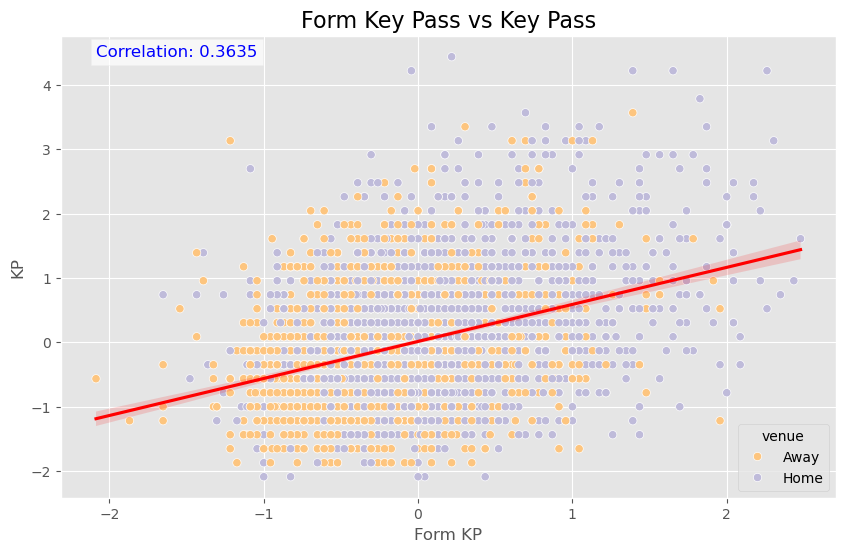

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='form_kp', y='kp', hue='venue', data=after_getform, palette='PuOr')
sns.regplot(x='form_kp', y='kp', data=after_getform, scatter=False, color='red')
plt.title('Form Key Pass vs Key Pass', fontsize=16)
plt.xlabel('Form KP', fontsize=12)
plt.ylabel('KP', fontsize=12)
corr_kp_kp = after_getform[['form_kp', 'kp']].corr().iloc[0, 1]
plt.text(x=after_getform['form_kp'].min(), 
         y=after_getform['kp'].max(), 
         s=f"Correlation: {corr_kp_kp:.4f}", 
         fontsize=12, color='blue', bbox=dict(facecolor='white', alpha=0.7))
plt.show()

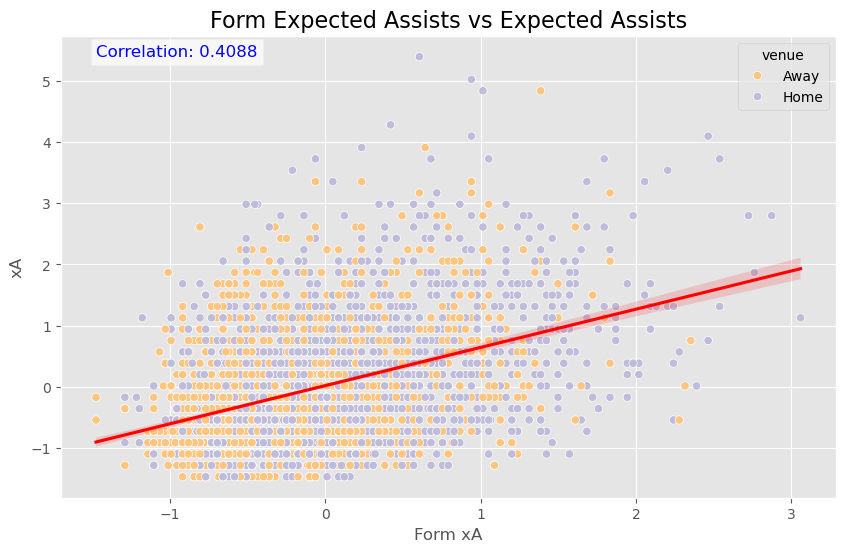

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='form_xa', y='xa', hue='venue', data=after_getform, palette='PuOr')
sns.regplot(x='form_xa', y='xa', data=after_getform, scatter=False, color='red')
plt.title('Form Expected Assists vs Expected Assists', fontsize=16)
plt.xlabel('Form xA', fontsize=12)
plt.ylabel('xA', fontsize=12)
corr_xa_xa = after_getform[['form_xa', 'xa']].corr().iloc[0, 1]
plt.text(x=after_getform['form_xa'].min(), 
         y=after_getform['xa'].max(), 
         s=f"Correlation: {corr_xa_xa:.4f}", 
         fontsize=12, color='blue', bbox=dict(facecolor='white', alpha=0.7))
plt.show()

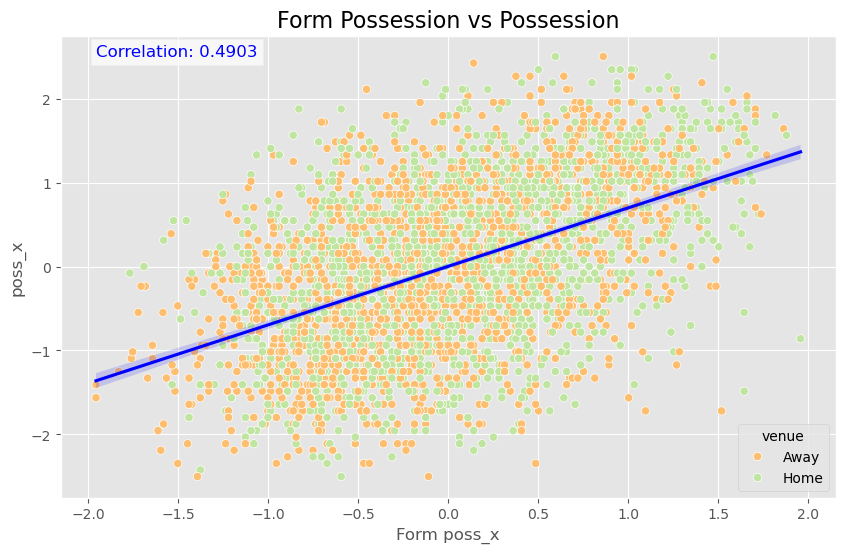

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='form_poss_x', y='poss_x', hue='venue', data=after_getform, palette='Spectral')
sns.regplot(x='form_poss_x', y='poss_x', data=after_getform, scatter=False, color='blue')
plt.title('Form Possession vs Possession', fontsize=16)
plt.xlabel('Form poss_x', fontsize=12)
plt.ylabel('poss_x', fontsize=12)
corr_poss_poss = after_getform[['form_poss_x', 'poss_x']].corr().iloc[0, 1]
plt.text(x=after_getform['form_poss_x'].min(), 
         y=after_getform['poss_x'].max(), 
         s=f"Correlation: {corr_poss_poss:.4f}", 
         fontsize=12, color='blue', bbox=dict(facecolor='white', alpha=0.7))
plt.show()

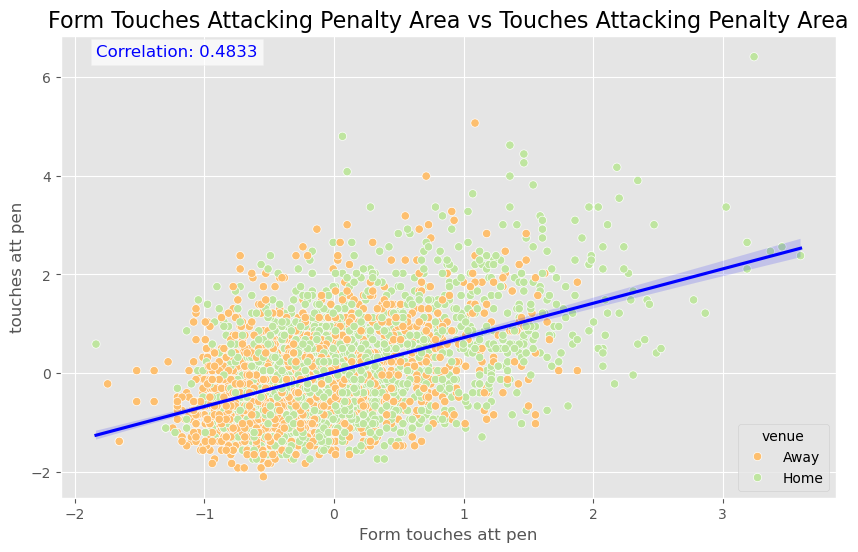

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='form_touches att pen', y='touches att pen', hue='venue', data=after_getform, palette='Spectral')
sns.regplot(x='form_touches att pen', y='touches att pen', data=after_getform, scatter=False, color='blue')
plt.title('Form Touches Attacking Penalty Area vs Touches Attacking Penalty Area', fontsize=16)
plt.xlabel('Form touches att pen', fontsize=12)
plt.ylabel('touches att pen', fontsize=12)
corr_tap_tap = after_getform[['form_touches att pen', 'touches att pen']].corr().iloc[0, 1]
plt.text(x=after_getform['form_touches att pen'].min(), 
         y=after_getform['touches att pen'].max(), 
         s=f"Correlation: {corr_tap_tap:.4f}", 
         fontsize=12, color='blue', bbox=dict(facecolor='white', alpha=0.7))
plt.show()

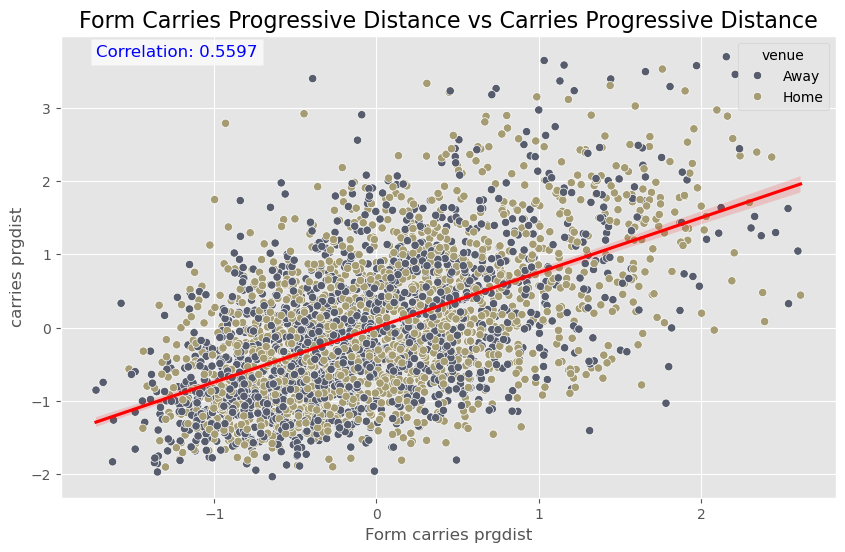

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='form_carries prgdist', y='carries prgdist', hue='venue', data=after_getform, palette='cividis')
sns.regplot(x='form_carries prgdist', y='carries prgdist', data=after_getform, scatter=False, color='red')
plt.title('Form Carries Progressive Distance vs Carries Progressive Distance', fontsize=16)
plt.xlabel('Form carries prgdist', fontsize=12)
plt.ylabel('carries prgdist', fontsize=12)
corr_cpd_cpd = after_getform[['form_carries prgdist', 'carries prgdist']].corr().iloc[0, 1]
plt.text(x=after_getform['form_carries prgdist'].min(), 
         y=after_getform['carries prgdist'].max(), 
         s=f"Correlation: {corr_cpd_cpd:.4f}", 
         fontsize=12, color='blue', bbox=dict(facecolor='white', alpha=0.7))
plt.show()

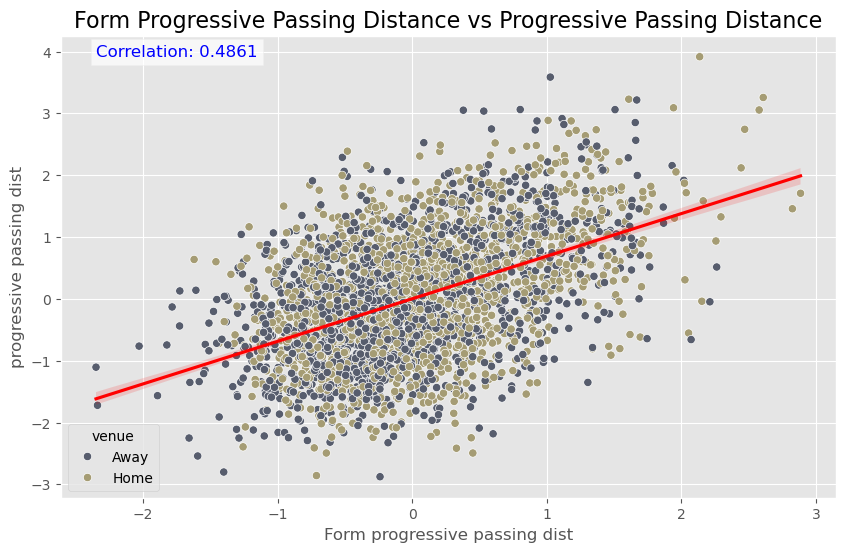

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='form_progressive passing dist', y='progressive passing dist', hue='venue', data=after_getform, palette='cividis')
sns.regplot(x='form_progressive passing dist', y='progressive passing dist', data=after_getform, scatter=False, color='red')
plt.title('Form Progressive Passing Distance vs Progressive Passing Distance', fontsize=16)
plt.xlabel('Form progressive passing dist', fontsize=12)
plt.ylabel('progressive passing dist', fontsize=12)
corr_ppd_ppd = after_getform[['form_progressive passing dist', 'progressive passing dist']].corr().iloc[0, 1]
plt.text(x=after_getform['form_progressive passing dist'].min(), 
         y=after_getform['progressive passing dist'].max(), 
         s=f"Correlation: {corr_ppd_ppd:.4f}", 
         fontsize=12, color='blue', bbox=dict(facecolor='white', alpha=0.7))
plt.show()

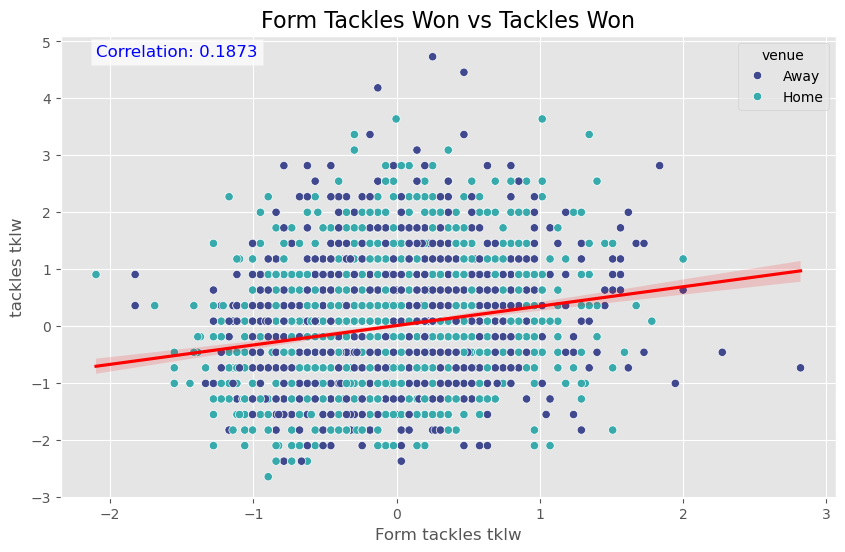

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='form_tackles tklw', y='tackles tklw', hue='venue', data=after_getform, palette='mako')
sns.regplot(x='form_tackles tklw', y='tackles tklw', data=after_getform, scatter=False, color='red')
plt.title('Form Tackles Won vs Tackles Won', fontsize=16)
plt.xlabel('Form tackles tklw', fontsize=12)
plt.ylabel('tackles tklw', fontsize=12)
corr_tklw_tklw = after_getform[['form_tackles tklw', 'tackles tklw']].corr().iloc[0, 1]
plt.text(x=after_getform['form_tackles tklw'].min(), 
         y=after_getform['tackles tklw'].max(), 
         s=f"Correlation: {corr_tklw_tklw:.4f}", 
         fontsize=12, color='blue', bbox=dict(facecolor='white', alpha=0.7))
plt.show()

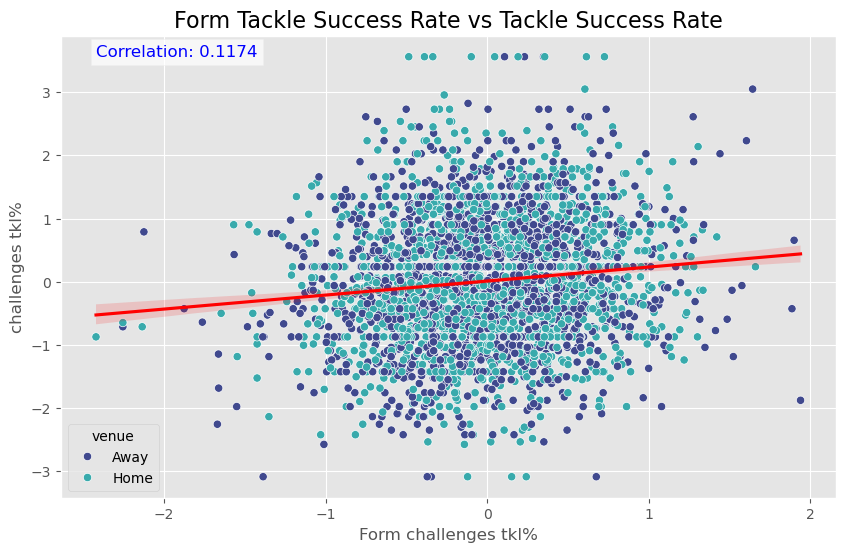

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='form_challenges tkl%', y='challenges tkl%', hue='venue', data=after_getform, palette='mako')
sns.regplot(x='form_challenges tkl%', y='challenges tkl%', data=after_getform, scatter=False, color='red')
plt.title('Form Tackle Success Rate vs Tackle Success Rate', fontsize=16)
plt.xlabel('Form challenges tkl%', fontsize=12)
plt.ylabel('challenges tkl%', fontsize=12)
corr_tkl_tkl = after_getform[['form_challenges tkl%', 'challenges tkl%']].corr().iloc[0, 1]
plt.text(x=after_getform['form_challenges tkl%'].min(), 
         y=after_getform['challenges tkl%'].max(), 
         s=f"Correlation: {corr_tkl_tkl:.4f}", 
         fontsize=12, color='blue', bbox=dict(facecolor='white', alpha=0.7))
plt.show()

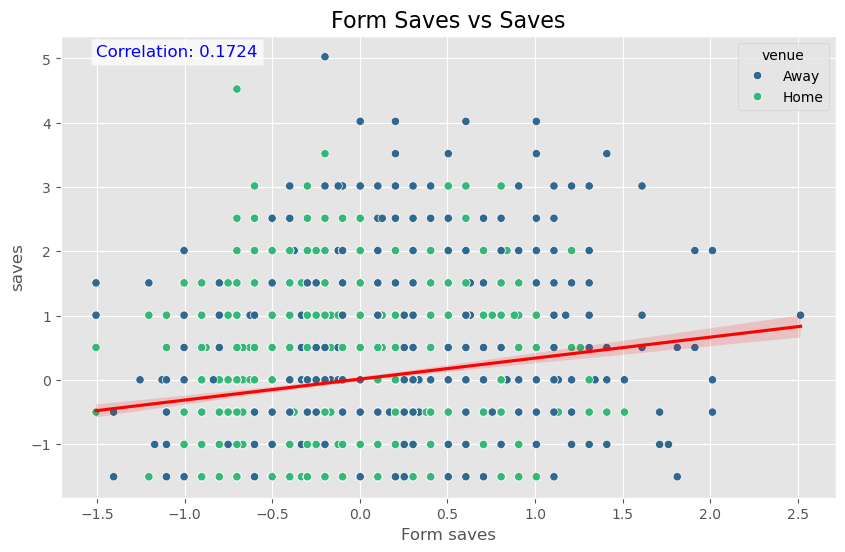

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='form_saves', y='saves', hue='venue', data=after_getform, palette='viridis')
sns.regplot(x='form_saves', y='saves', data=after_getform, scatter=False, color='red')
plt.title('Form Saves vs Saves', fontsize=16)
plt.xlabel('Form saves', fontsize=12)
plt.ylabel('saves', fontsize=12)
corr_saves_saves = after_getform[['form_saves', 'saves']].corr().iloc[0, 1]
plt.text(x=after_getform['form_saves'].min(), 
         y=after_getform['saves'].max(), 
         s=f"Correlation: {corr_saves_saves:.4f}", 
         fontsize=12, color='blue', bbox=dict(facecolor='white', alpha=0.7))
plt.show()

### Form vs GF and GA

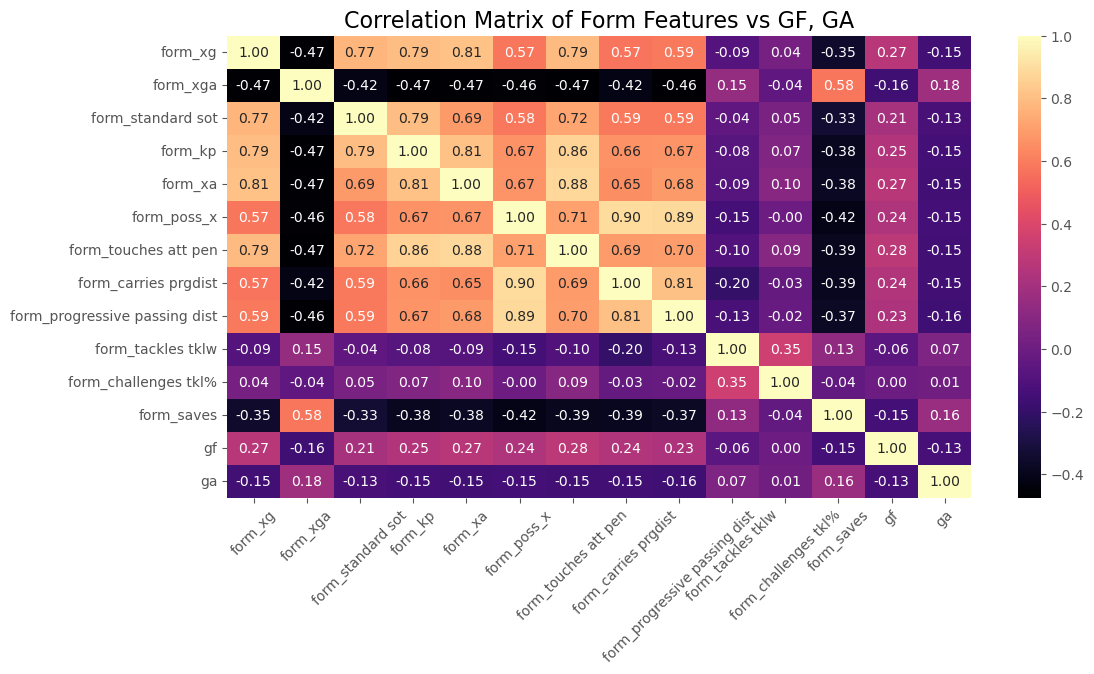

In [38]:
# correlation matrix of features_to_use and result
features_to_use = ['form_xg', 'form_xga', 'form_standard sot', 'form_kp', 'form_xa', 'form_poss_x', 'form_touches att pen',
       'form_carries prgdist', 'form_progressive passing dist', 'form_tackles tklw', 'form_challenges tkl%', 'form_saves']
corr = after_getform[features_to_use + ['gf', 'ga']].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='magma', fmt=".2f")
plt.title('Correlation Matrix of Form Features vs GF, GA', fontsize=16)
plt.xticks(rotation=45)
plt.show()

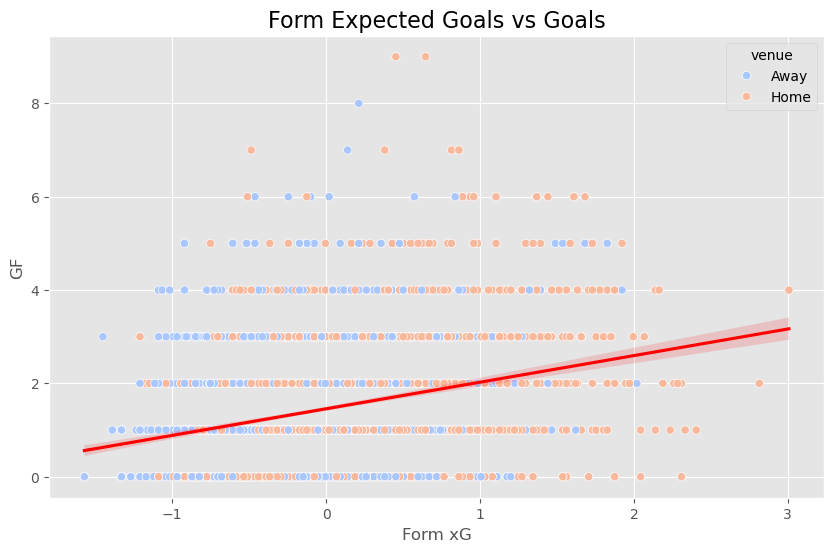

Correlation between Form Expected Goals and Goals: 0.2716442858242754


In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='form_xg', y='noscale_gf', hue='venue', data=after_getform, palette='coolwarm')
sns.regplot(x='form_xg', y='noscale_gf', data=after_getform, scatter=False, color='red')
plt.title('Form Expected Goals vs Goals', fontsize=16)
plt.xlabel('Form xG', fontsize=12)
plt.ylabel('GF', fontsize=12)
plt.show()

corr_xg_gf = after_getform[['form_xg', 'noscale_gf']].corr().iloc[0, 1]
print(f"Correlation between Form Expected Goals and Goals: {corr_xg_gf}")

Correlation between Form Expected Goals Against and Goals Against: 0.1809638987244986


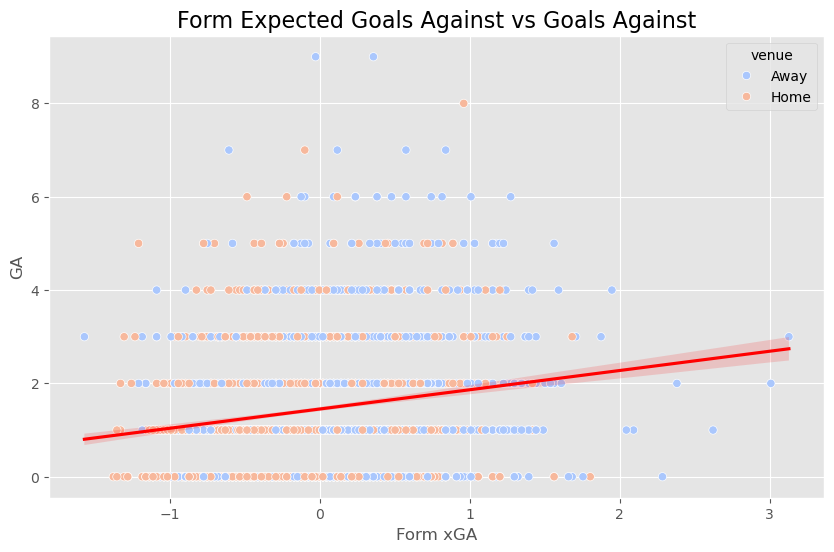

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='form_xga', y='noscale_ga', hue='venue', data=after_getform, palette='coolwarm')
sns.regplot(x='form_xga', y='noscale_ga', data=after_getform, scatter=False, color='red')
plt.title('Form Expected Goals Against vs Goals Against', fontsize=16)
plt.xlabel('Form xGA', fontsize=12)
plt.ylabel('GA', fontsize=12)

corr_xga_ga = after_getform[['form_xga', 'noscale_ga']].corr().iloc[0, 1]
print(f"Correlation between Form Expected Goals Against and Goals Against: {corr_xga_ga}")

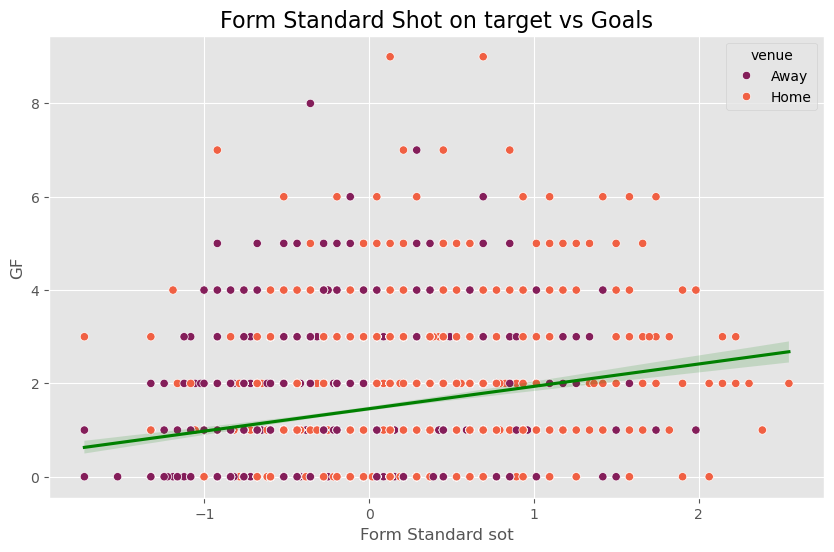

Correlation between Form Standard Shot on target and Goals: 0.21028449311179162


In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='form_standard sot', y='noscale_gf', hue='venue', data=after_getform, palette='rocket')
sns.regplot(x='form_standard sot', y='noscale_gf', data=after_getform, scatter=False, color='green')
plt.title('Form Standard Shot on target vs Goals', fontsize=16)
plt.xlabel('Form Standard sot', fontsize=12)
plt.ylabel('GF', fontsize=12)
plt.show()

corr_sot_gf = after_getform[['form_standard sot', 'noscale_gf']].corr().iloc[0, 1]
print(f"Correlation between Form Standard Shot on target and Goals: {corr_sot_gf}")

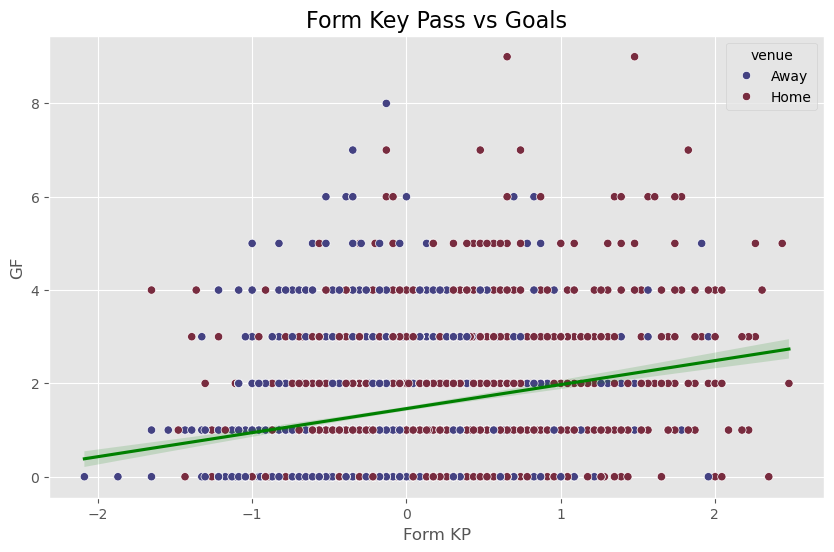

Correlation between Form Key Pass and Goals: 0.2505884702978766


In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='form_kp', y='noscale_gf', hue='venue', data=after_getform, palette='icefire')
sns.regplot(x='form_kp', y='noscale_gf', data=after_getform, scatter=False, color='green')
plt.title('Form Key Pass vs Goals', fontsize=16)
plt.xlabel('Form KP', fontsize=12)
plt.ylabel('GF', fontsize=12)
plt.show()

corr_kp_gf = after_getform[['form_kp', 'noscale_gf']].corr().iloc[0, 1]
print(f"Correlation between Form Key Pass and Goals: {corr_kp_gf}")

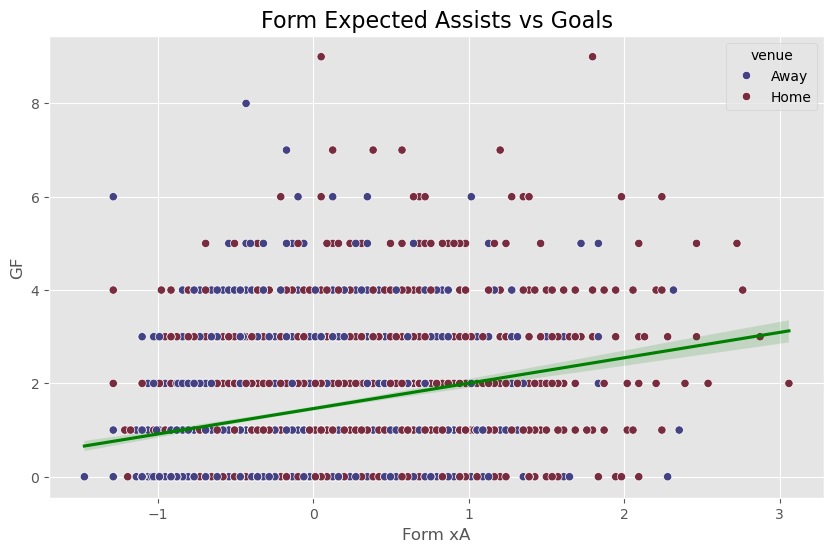

Correlation between Form Expected Assists and Goals: 0.2741000673350758


In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='form_xa', y='noscale_gf', hue='venue', data=after_getform, palette='icefire')
sns.regplot(x='form_xa', y='noscale_gf', data=after_getform, scatter=False, color='green')
plt.title('Form Expected Assists vs Goals', fontsize=16)
plt.xlabel('Form xA', fontsize=12)
plt.ylabel('GF', fontsize=12)
plt.show()

corr_xa_gf = after_getform[['form_xa', 'noscale_gf']].corr().iloc[0, 1]
print(f"Correlation between Form Expected Assists and Goals: {corr_xa_gf}")

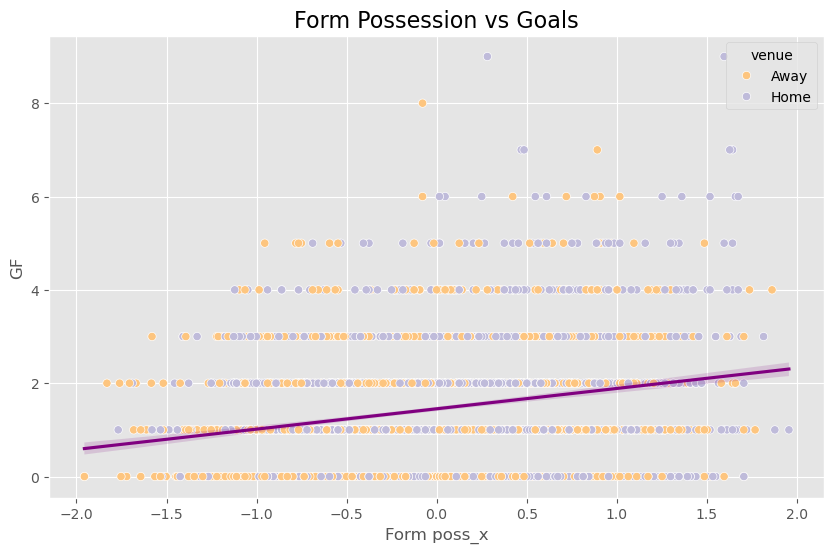

Correlation between Form Possession and Goals: 0.23531825295590614


In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='form_poss_x', y='noscale_gf', hue='venue', data=after_getform, palette='PuOr')
sns.regplot(x='form_poss_x', y='noscale_gf', data=after_getform, scatter=False, color='purple')
plt.title('Form Possession vs Goals', fontsize=16)
plt.xlabel('Form poss_x', fontsize=12)
plt.ylabel('GF', fontsize=12)
plt.show()

corr_poss_gf = after_getform[['form_poss_x', 'noscale_gf']].corr().iloc[0, 1]
print(f"Correlation between Form Possession and Goals: {corr_poss_gf}")

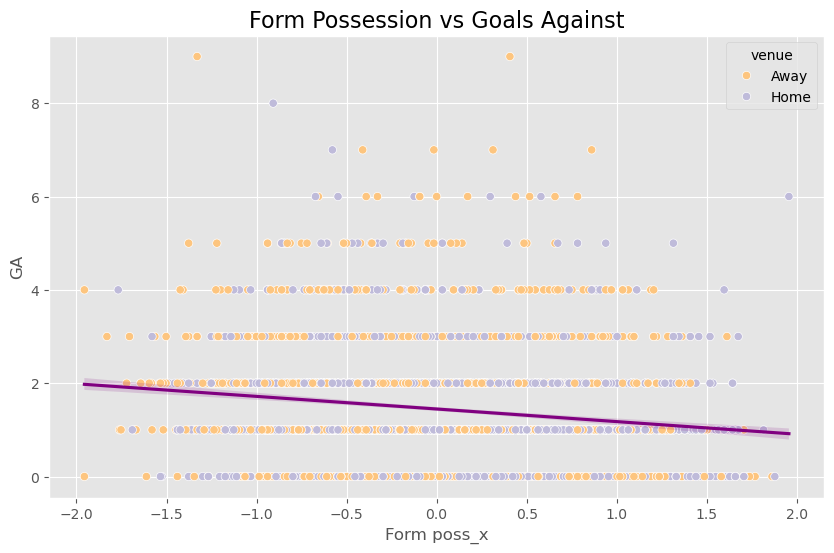

Correlation between Form Possession and Goals Against: -0.1464647729972884


In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='form_poss_x', y='noscale_ga', hue='venue', data=after_getform, palette='PuOr')
sns.regplot(x='form_poss_x', y='noscale_ga', data=after_getform, scatter=False, color='purple')
plt.title('Form Possession vs Goals Against', fontsize=16)
plt.xlabel('Form poss_x', fontsize=12)
plt.ylabel('GA', fontsize=12)
plt.show()

corr_poss_ga = after_getform[['form_poss_x', 'noscale_ga']].corr().iloc[0, 1]
print(f"Correlation between Form Possession and Goals Against: {corr_poss_ga}")


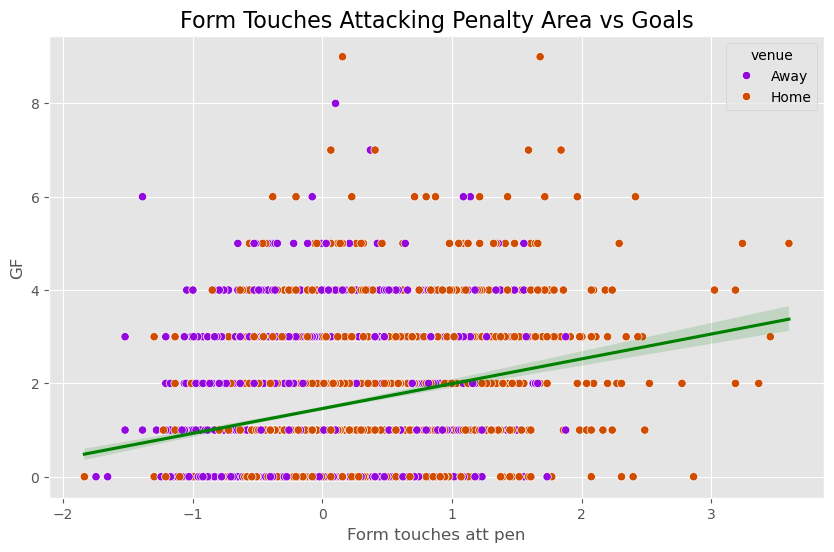

Correlation between Form Touches Attacking Penalty Area and Goals: 0.28360564612550343


In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='form_touches att pen', y='noscale_gf', hue='venue', data=after_getform, palette='gnuplot')
sns.regplot(x='form_touches att pen', y='noscale_gf', data=after_getform, scatter=False, color='green')
plt.title('Form Touches Attacking Penalty Area vs Goals', fontsize=16)
plt.xlabel('Form touches att pen', fontsize=12)
plt.ylabel('GF', fontsize=12)
plt.show()

corr_tap_gf = after_getform[['form_touches att pen', 'noscale_gf']].corr().iloc[0, 1]
print(f"Correlation between Form Touches Attacking Penalty Area and Goals: {corr_tap_gf}")

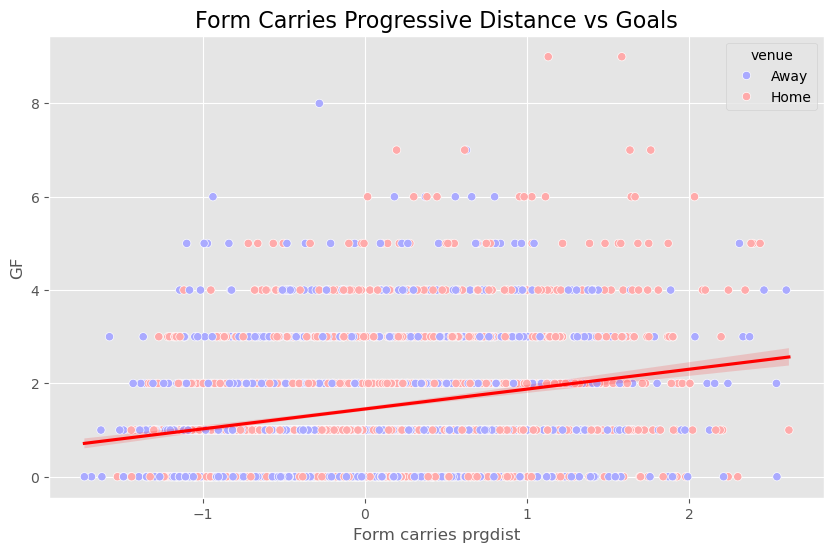

Correlation between Form Carries Progressive Distance and Goals: 0.2448284147035343


In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='form_carries prgdist', y='noscale_gf', hue='venue', data=after_getform, palette='bwr')
sns.regplot(x='form_carries prgdist', y='noscale_gf', data=after_getform, scatter=False, color='red')
plt.title('Form Carries Progressive Distance vs Goals', fontsize=16)
plt.xlabel('Form carries prgdist', fontsize=12)
plt.ylabel('GF', fontsize=12)
plt.show()

corr_cpd_gf = after_getform[['form_carries prgdist', 'noscale_gf']].corr().iloc[0, 1]
print(f"Correlation between Form Carries Progressive Distance and Goals: {corr_cpd_gf}")


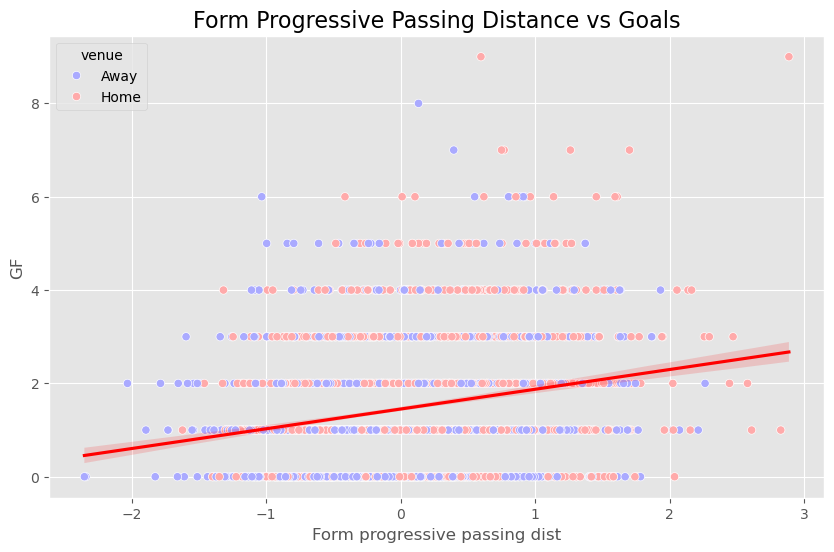

Correlation between Form Progressive Passing Distance and Goals: 0.23009963424704913


In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='form_progressive passing dist', y='noscale_gf', hue='venue', data=after_getform, palette='bwr')
sns.regplot(x='form_progressive passing dist', y='noscale_gf', data=after_getform, scatter=False, color='red')
plt.title('Form Progressive Passing Distance vs Goals', fontsize=16)
plt.xlabel('Form progressive passing dist', fontsize=12)
plt.ylabel('GF', fontsize=12)
plt.show()

corr_ppd_gf = after_getform[['form_progressive passing dist', 'noscale_gf']].corr().iloc[0, 1]
print(f"Correlation between Form Progressive Passing Distance and Goals: {corr_ppd_gf}")

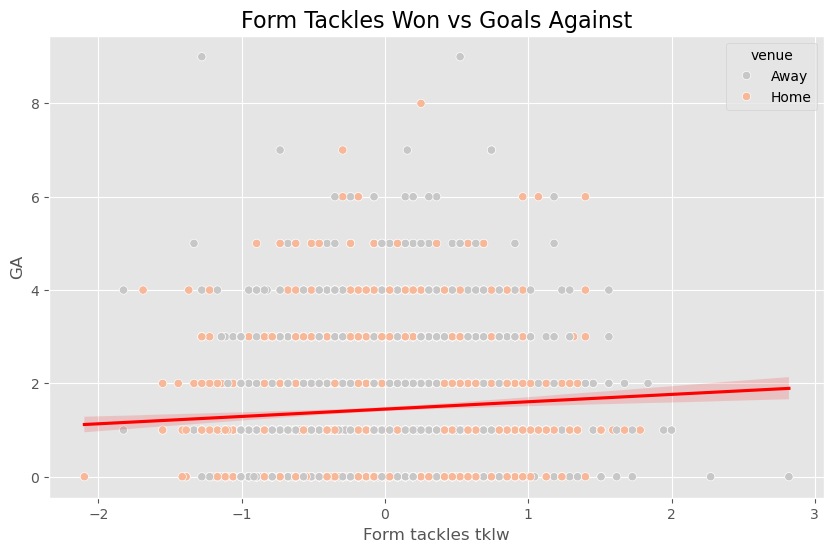

Correlation between Form Tackles Won and Goals Against: 0.06671885689398865


In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='form_tackles tklw', y='noscale_ga', hue='venue', data=after_getform, palette='RdGy_r')
sns.regplot(x='form_tackles tklw', y='noscale_ga', data=after_getform, scatter=False, color='red')
plt.title('Form Tackles Won vs Goals Against', fontsize=16)
plt.xlabel('Form tackles tklw', fontsize=12)
plt.ylabel('GA', fontsize=12)
plt.show()

corr_tklw_ga = after_getform[['form_tackles tklw', 'noscale_ga']].corr().iloc[0, 1]
print(f"Correlation between Form Tackles Won and Goals Against: {corr_tklw_ga}")

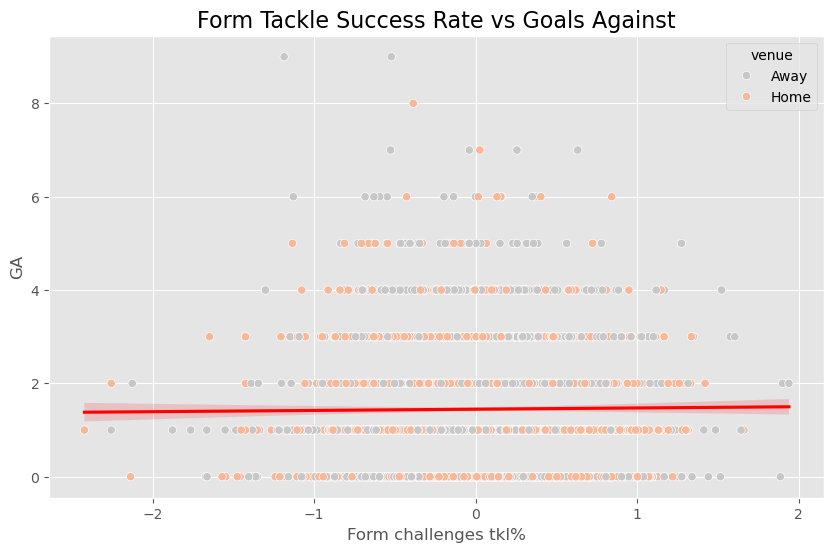

Correlation between Form Tackle Success Rate and Goals Against: 0.010904090990003515


In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='form_challenges tkl%', y='noscale_ga', hue='venue', data=after_getform, palette='RdGy_r')
sns.regplot(x='form_challenges tkl%', y='noscale_ga', data=after_getform, scatter=False, color='red')
plt.title('Form Tackle Success Rate vs Goals Against', fontsize=16)
plt.xlabel('Form challenges tkl%', fontsize=12)
plt.ylabel('GA', fontsize=12)
plt.show()

corr_tkl_ga = after_getform[['form_challenges tkl%', 'noscale_ga']].corr().iloc[0, 1]
print(f"Correlation between Form Tackle Success Rate and Goals Against: {corr_tkl_ga}")


In [51]:
after_getform['diff'] = after_getform['noscale_gf'] - after_getform['noscale_ga']

C:\Users\admin\AppData\Local\Temp\ipykernel_44020\3296750422.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




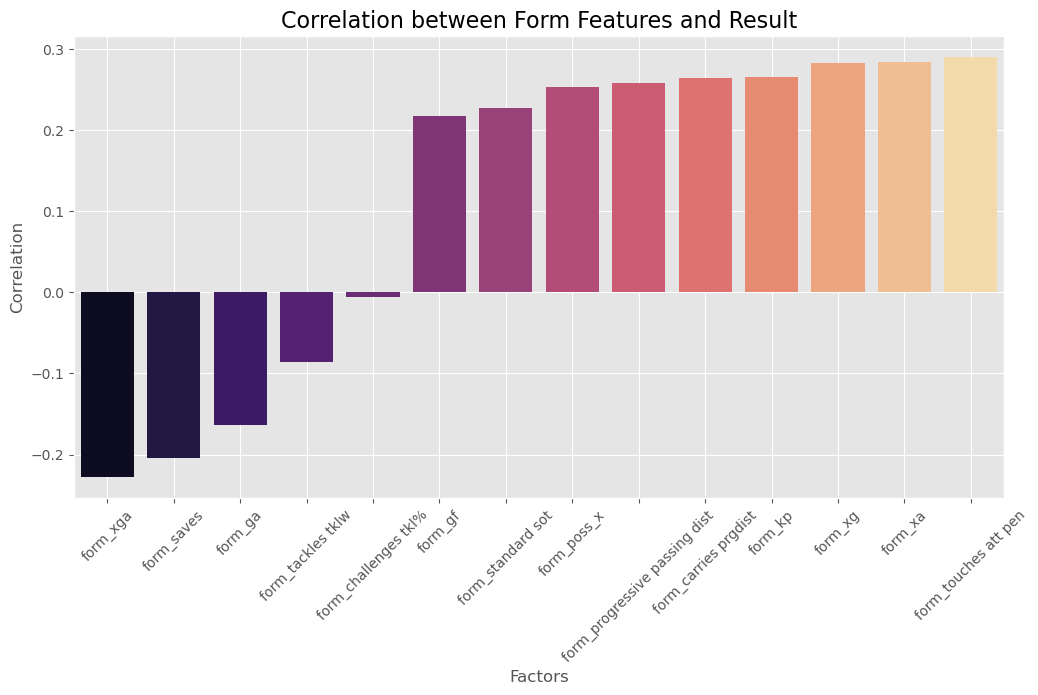

In [52]:
cols_to_use = [col for col in after_getform.columns if 'form' in col]
corr_res = after_getform[cols_to_use + ['diff']].corr()['diff'].drop(['diff']).sort_values(ascending=True)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.barplot(x=corr_res.index, y=corr_res.values, palette='magma')
plt.title('Correlation between Form Features and Result', fontsize=16)
plt.xlabel('Factors', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

## Combined Data

In [53]:
matches_stats = pd.read_csv('../../data/preprocessed/layer1/matches_stats_data.csv')
matches_stats.head()

hometeam awayteam        date     season  round   gf   ga  h_form_gf  \
0      CRY      SOU  2020-09-12  2020-2021      1  1.0  0.0        NaN   
1      FUL      ARS  2020-09-12  2020-2021      1  0.0  3.0        NaN   
2      LIV      LEE  2020-09-12  2020-2021      1  4.0  3.0        NaN   
3      WHU      NEW  2020-09-12  2020-2021      1  0.0  2.0        NaN   
4      TOT      EVE  2020-09-13  2020-2021      1  0.0  1.0        NaN   

   h_form_ga  h_form_xg  ...  h_defence_rating  h_avg_age  \
0        NaN        NaN  ...         -0.778312   2.010296   
1        NaN        NaN  ...         -1.076389  -1.127079   
2        NaN        NaN  ...          0.712073  -0.009867   
3        NaN        NaN  ...         -0.182158   1.382821   
4        NaN        NaN  ...          1.010150   0.686477   

   a_strength_overall_away  a_overall_rating  a_attack_rating  \
0                -0.737703         -0.711706        -0.399709   
1                 0.811999          0.481221         1.152498   
2                -0.014509         -0.711706        -0.141008   
3                -1.047643         -0.711706        -0.399709   
4                -0.427762          0.182989         0.635096   

   a_midfield_rating  a_defence_rating  a_avg_age       soh       soa  
0          -0.354526         -0.480235   0.127871 -0.313369 -0.245059  
1           0.188065          0.413996  -0.912819 -0.313369  0.666784  
2          -0.625821         -0.778312  -0.637343  0.635920  0.180468  
3          -0.897117         -1.076389   0.755346  0.517259 -0.427427  
4           0.188065          0.712073   0.686477  0.279936 -0.062690  

[5 rows x 55 columns]

<Axes: xlabel='season'>

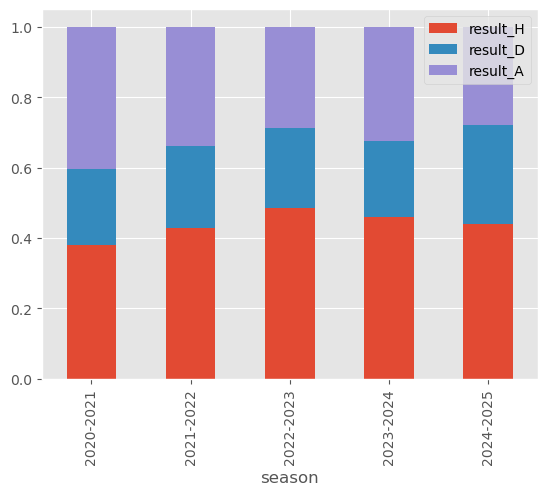

In [54]:
season_counts = matches_stats.groupby('season')[['result_H', 'result_D', 'result_A']].sum()
season_counts.div(season_counts.sum(axis=1), axis=0).plot(kind='bar', stacked=True)

### Correlation between betting features and result

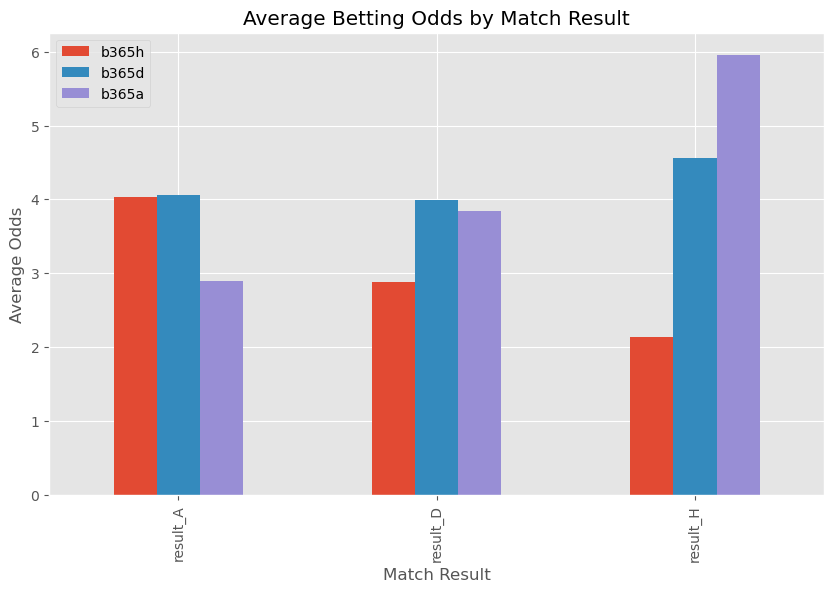

In [55]:
matches_stats['result'] = matches_stats[['result_H', 'result_D', 'result_A']].idxmax(axis=1)
odds_mean = matches_stats.groupby('result')[['b365h', 'b365d', 'b365a']].mean()
odds_mean.plot(kind='bar', figsize=(10, 6))
plt.title('Average Betting Odds by Match Result')
plt.ylabel('Average Odds')
plt.xlabel('Match Result')
plt.show()

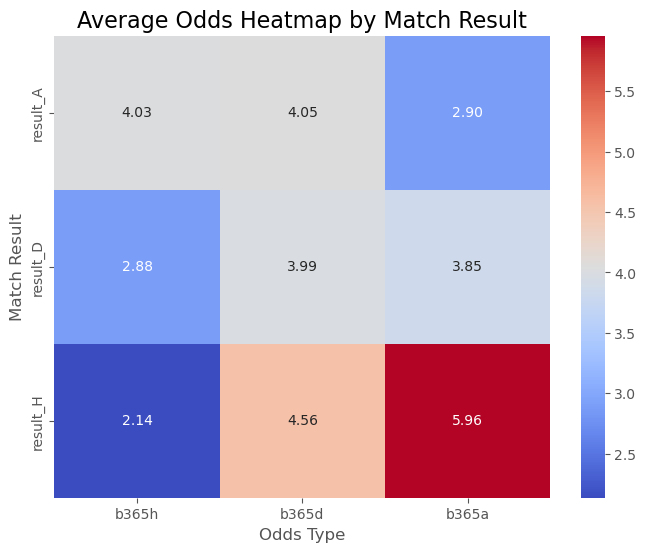

In [56]:
# Tính trung bình tỷ lệ cược theo kết quả
mean_odds = matches_stats.groupby('result')[['b365h', 'b365d', 'b365a']].mean()

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(mean_odds, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Average Odds Heatmap by Match Result', fontsize=16)
plt.xlabel('Odds Type', fontsize=12)
plt.ylabel('Match Result', fontsize=12)
plt.show()


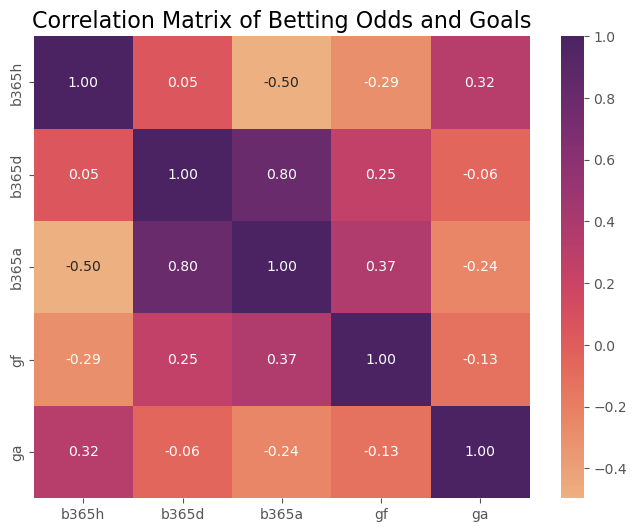

In [57]:
corr = matches_stats[['b365h', 'b365d', 'b365a', 'gf', 'ga']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='flare', fmt=".2f")
plt.title('Correlation Matrix of Betting Odds and Goals', fontsize=16)
plt.show()

In [58]:
matches_stats.columns

Index(['hometeam', 'awayteam', 'date', 'season', 'round', 'gf', 'ga',
       'h_form_gf', 'h_form_ga', 'h_form_xg', 'h_form_xga',
       'h_form_standard sot', 'h_form_kp', 'h_form_xa', 'h_form_poss_x',
       'h_form_touches att pen', 'h_form_carries prgdist',
       'h_form_progressive passing dist', 'h_form_tackles tklw',
       'h_form_challenges tkl%', 'h_form_saves', 'a_form_gf', 'a_form_ga',
       'a_form_xg', 'a_form_xga', 'a_form_standard sot', 'a_form_kp',
       'a_form_xa', 'a_form_poss_x', 'a_form_touches att pen',
       'a_form_carries prgdist', 'a_form_progressive passing dist',
       'a_form_tackles tklw', 'a_form_challenges tkl%', 'a_form_saves',
       'b365h', 'b365d', 'b365a', 'result_A', 'result_D', 'result_H',
       'h_strength_overall_home', 'h_overall_rating', 'h_attack_rating',
       'h_midfield_rating', 'h_defence_rating', 'h_avg_age',
       'a_strength_overall_away', 'a_overall_rating', 'a_attack_rating',
       'a_midfield_rating', 'a_defence_rating', 

### Average age vs result

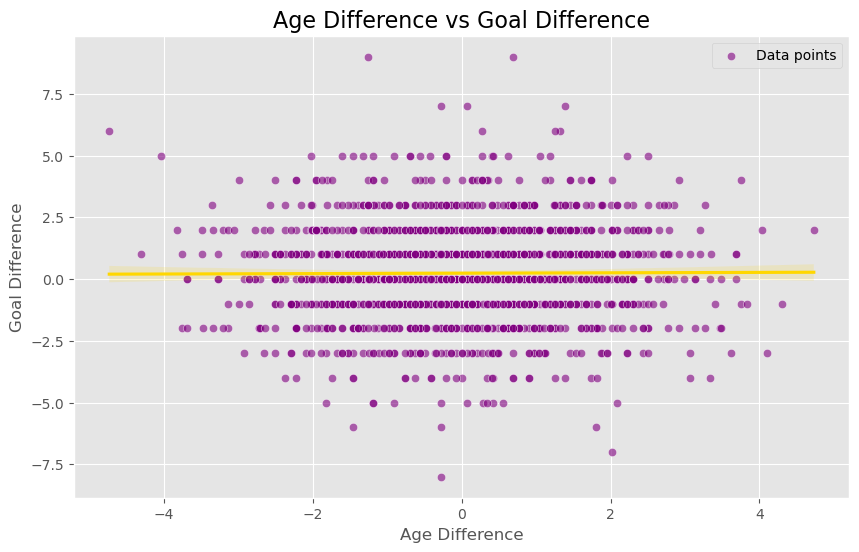

Correlation between Age Difference and Goal Difference: 0.005872429955827252


In [59]:
matches_stats['age_diff'] = matches_stats['h_avg_age'] - matches_stats['a_avg_age']
matches_stats['goal_diff'] = matches_stats['gf'] - matches_stats['ga']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age_diff', y='goal_diff', data=matches_stats, color='purple', alpha=0.6, label='Data points')
sns.regplot(x='age_diff', y='goal_diff', data=matches_stats, scatter=False, color='gold')
plt.title('Age Difference vs Goal Difference', fontsize=16)
plt.xlabel('Age Difference', fontsize=12)
plt.ylabel('Goal Difference', fontsize=12)
plt.show()

corr_age_goal = matches_stats[['age_diff', 'goal_diff']].corr().iloc[0, 1]
print(f"Correlation between Age Difference and Goal Difference: {corr_age_goal}")

### ELO vs Result

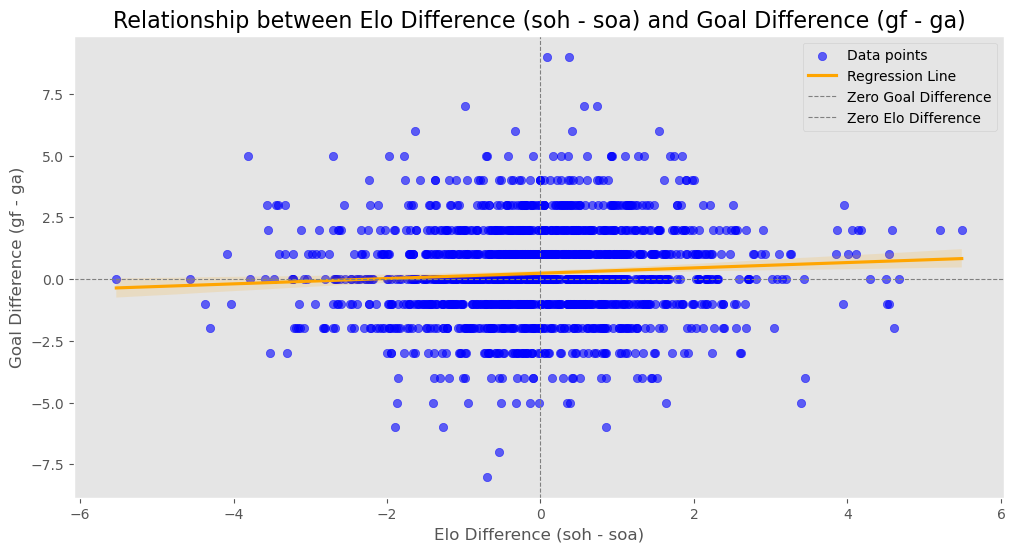

Correlation between Elo Difference and Goal Difference: 0.07449950668121727


In [60]:
matches_stats['elo_diff'] = matches_stats['soh'] - matches_stats['soa']
matches_stats['goal_diff'] = matches_stats['gf'] - matches_stats['ga']

plt.figure(figsize=(12, 6))
plt.scatter(matches_stats['elo_diff'], matches_stats['goal_diff'], color='blue', alpha=0.6, label='Data points')
sns.regplot(x='elo_diff', y='goal_diff', data=matches_stats, scatter=False, color='orange', label='Regression Line')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8, label='Zero Goal Difference')
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8, label='Zero Elo Difference')
plt.title('Relationship between Elo Difference (soh - soa) and Goal Difference (gf - ga)', fontsize=16)
plt.xlabel('Elo Difference (soh - soa)', fontsize=12)
plt.ylabel('Goal Difference (gf - ga)', fontsize=12)
plt.legend()
plt.grid()
plt.show()

corr = matches_stats[['elo_diff', 'goal_diff']].corr().iloc[0, 1]
print(f"Correlation between Elo Difference and Goal Difference: {corr}")

matches_stats.drop(columns=['elo_diff', 'goal_diff'], inplace=True)

### FIFA Stats vs Result

C:\Users\admin\AppData\Local\Temp\ipykernel_44020\3749970212.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




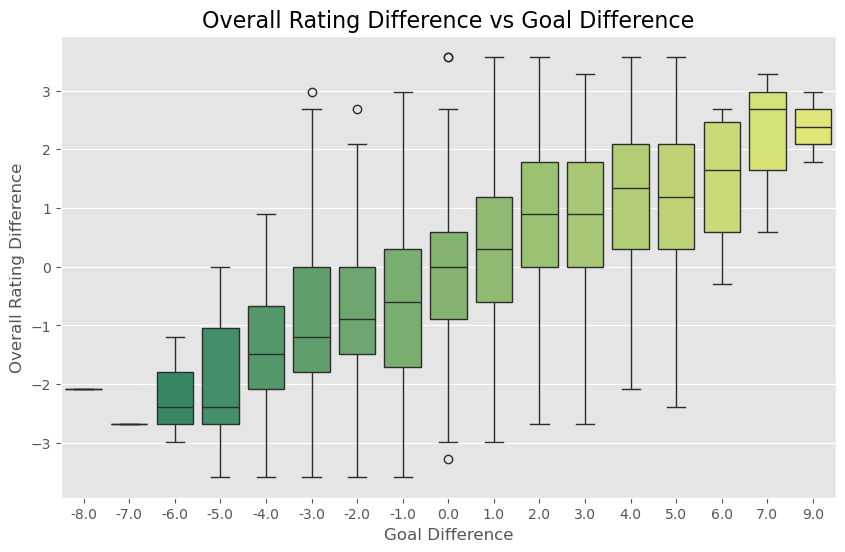

In [61]:
matches_stats['goal_diff'] = matches_stats['gf'] - matches_stats['ga']
matches_stats['rate_diff'] = matches_stats['h_overall_rating'] - matches_stats['a_overall_rating']

plt.figure(figsize=(10, 6))
sns.boxplot(x='goal_diff', y='rate_diff', data=matches_stats, palette='summer')
plt.title('Overall Rating Difference vs Goal Difference', fontsize=16)
plt.xlabel('Goal Difference', fontsize=12)
plt.ylabel('Overall Rating Difference', fontsize=12)
plt.show()

matches_stats.drop(columns=['goal_diff', 'rate_diff'], inplace=True)

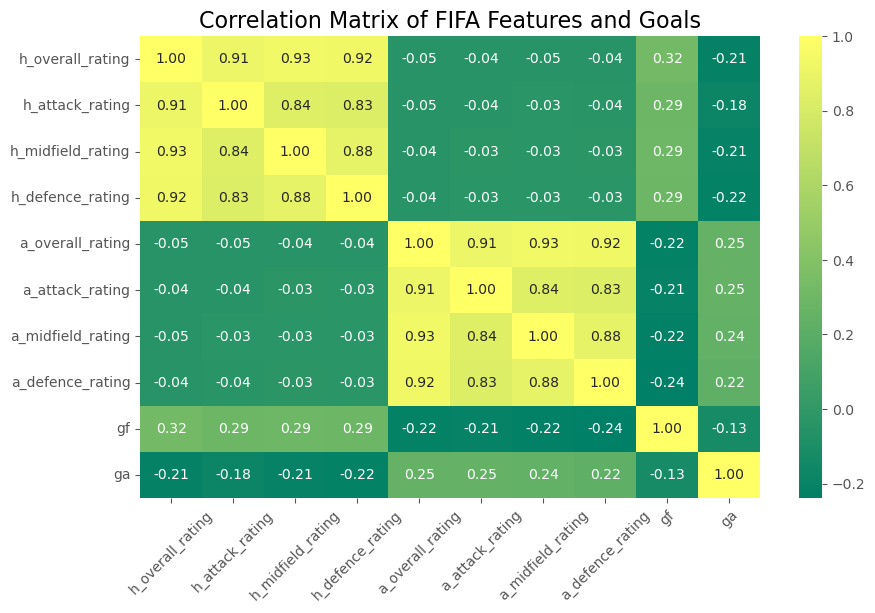

In [62]:
fifa_features = ['h_overall_rating', 'h_attack_rating', 'h_midfield_rating', 'h_defence_rating',
       'a_overall_rating', 'a_attack_rating', 'a_midfield_rating', 'a_defence_rating']

# correlation matrix of fifa features and gf, ga
corr = matches_stats[fifa_features + ['gf', 'ga']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='summer', fmt=".2f")
plt.title('Correlation Matrix of FIFA Features and Goals', fontsize=16)
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='hometeam'>

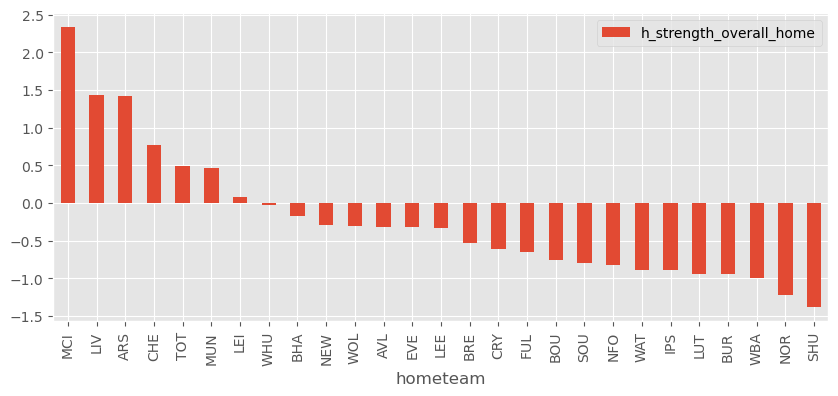

In [63]:
matches_stats.groupby('hometeam')[['h_strength_overall_home']].mean().sort_values('h_strength_overall_home', ascending=False).plot(kind='bar', figsize=(10, 4))

<Axes: xlabel='awayteam'>

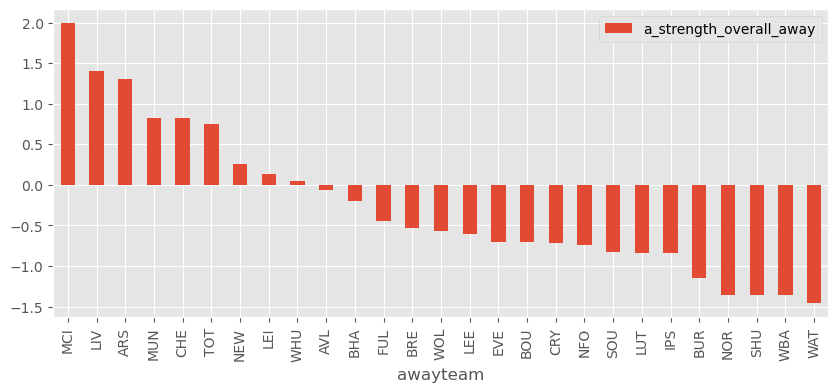

In [64]:
matches_stats.groupby('awayteam')[['a_strength_overall_away']].mean().sort_values('a_strength_overall_away', ascending=False).plot(kind='bar', figsize=(10, 4))